# SOLL DADDIES Members and Contributions

1. **CHUA, MICOLE KEESHA ANG** - [micole_chua@dlsu.edu.ph](mailto:micole_chua@dlsu.edu.ph)
   - **Contribution**: Preprocessing, Biviariate EDA and Insights.
   
2. **HERCE, DOMINIC MARCUS REYES** - [dominic_herce@dlsu.edu.ph](mailto:dominic_herce@dlsu.edu.ph)
   - **Contribution**: Preprocessing and EDA

3. **LABABIDI, MEZEN CARLOS** - [mez_lababidi@dlsu.edu.ph](mailto:mez_lababidi@dlsu.edu.ph)
   - **Contribution**: Preprocessing, EDA, Linear Regression, and Insights

4. **SALIH, SHEM MATTHEW JIKIRI** - [shem_matthew_salih@dlsu.edu.ph](mailto:shem_matthew_salih@dlsu.edu.ph)
   - **Contribution**: Preprocessing, EDA, Linear Regression, and Insights

5. **TAMSE, ANDREI GONZALES** - [andrei_tamse@dlsu.edu.ph](mailto:andrei_tamse@dlsu.edu.ph)
   - **Contribution**: Preprocessing, Univariate and Bivariate EDA, Approach and Methdology, Random Forest Model, Feature Importance, Hyperparamter Tuning, Key Finding and Insights, Summary, Limitations, and Notebook Formatting.

## **GitHub Repository**
🔗 [SOLLDDA1 Project Repository](https://github.com/odxscholars/sollda1)

# Objectives
- Identify **fast-moving products** to improve inventory management.
- Predict the **time until stockout** for different shoe categories.
- Assist in **demand forecasting** to ensure product availability.

# Problem Statement

- **Stockouts** lead to **lost sales** and **dissatisfied customers**.
- **Overstocking** ties up capital and **increases storage costs**.
- The challenge is to **accurately forecast stock depletion** based on factors such as **price, availability, category, and listing age**.


# Imports

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import squarify
import re

from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, mean_absolute_error, r2_score


# Loading Adidas Dataset

In [1]:
dataset_dir = "dataset/"
country_dim = pd.read_csv(dataset_dir + "country_dim.csv")
shoes_dim = pd.read_csv(dataset_dir + "shoes_dim.csv")
shoes_fact = pd.read_csv(dataset_dir + "shoes_fact.csv")

NameError: name 'pd' is not defined

### Describing the Dataset

| **Variable**        | **Description**                                      | **Example**         |
|---------------------|------------------------------------------------------|---------------------|
| **name**           | Model name of the shoe                               | Adidas Ultraboost  |
| **id**             | SKU (Stock Keeping Unit)                             | FW4312             |
| **price**          | Price in **Euros (€)**                               | 120.99             |
| **category**       | Shoe style/type                                      | Running, Casual    |
| **dominant_color** | Main color of the shoe                              | Black              |
| **sub_color1**     | First accent color                                  | White              |
| **sub_color2**     | Second accent color                                 | Red                |
| **best_for_wear**  | Recommended occasion/use                            | Sports, Casual     |
| **size**           | Shoe size (EU, US, UK formats)                      | EU 42, US 9, UK 8  |
| **availability**   | Stock level (**Min: 0, Max: 15**)                    | 10                 |
| **image_url**      | Link to the shoe image (side view)                  | *(URL to Image)*   |
| **gender**         | Target gender (U = Unisex, W = Women, M = Men, K = Kids) | M            |
| **date**           | Date of listing (**dd/mm/yyyy**)                     | 15/03/2025         |
| **country_code**   | Country where the shoe is available (US, DE, UK, BE) | US                 |


# Preprocessing

### Reviewing the dimensions

In [ ]:
country_dim.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   country_code  4 non-null      object
 1   currency      4 non-null      object
 2   shoe_metric   4 non-null      object
dtypes: object(3)
memory usage: 228.0+ bytes


In [ ]:
shoes_dim.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3302 entries, 0 to 3301
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              3302 non-null   object
 1   name            3302 non-null   object
 2   best_for_wear   3302 non-null   object
 3   gender          3302 non-null   object
 4   image_url       3302 non-null   object
 5   dominant_color  3302 non-null   object
 6   sub_color1      3300 non-null   object
 7   sub_color2      3298 non-null   object
dtypes: object(8)
memory usage: 206.5+ KB


In [ ]:
shoes_fact.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299156 entries, 0 to 299155
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    299156 non-null  int64  
 1   id            299156 non-null  object 
 2   price         299156 non-null  float64
 3   category      299156 non-null  object 
 4   size          299156 non-null  object 
 5   availability  299156 non-null  int64  
 6   date          299156 non-null  object 
 7   country_code  299156 non-null  object 
dtypes: float64(1), int64(2), object(5)
memory usage: 18.3+ MB


### Merge the datasets first

In [ ]:
country_dim

,country_code,currency,shoe_metric
0,DE,euro,eu
1,US,usd,usa
2,BE,euro,eu
3,UK,pounds,uk


In [ ]:
shoes_dim.head(5)

,id,name,best_for_wear,gender,image_url,dominant_color,sub_color1,sub_color2
0,HP9426,Breaknet 2.0 Schuh,City,U,"https://assets.adidas.com/images/w_600,f_auto,...",Cloud White,Core Black,Cloud White
1,HQ4199,Ultraboost 1.0 Laufschuh,City,U,"https://assets.adidas.com/images/w_600,f_auto,...",Core Black,Core Black,Beam Green
2,JQ2552,Adizero Boston 12 Laufschuh,Racing,U,"https://assets.adidas.com/images/w_600,f_auto,...",Cloud White,Core Black,Lucid Red
3,JI1896,NY 90 Schuh,Neutral,U,"https://assets.adidas.com/images/w_600,f_auto,...",Cloud White,Cloud White,Crystal White
4,IE8976,Ultraboost 1.0 Laufschuh,Neutral,U,"https://assets.adidas.com/images/w_600,f_auto,...",Grey One,Grey Three,Grey One


In [ ]:
shoes_fact.rename(columns={"Unnamed: 0" : "SN"}, inplace=True)
shoes_fact.head(5)

,SN,id,price,category,size,availability,date,country_code
0,63575,HP9426,60.0,sneakers,36,0,07/01/2025,DE
1,63576,HP9426,60.0,sneakers,36 2/3,0,07/01/2025,DE
2,63577,HP9426,60.0,sneakers,37 1/3,0,07/01/2025,DE
3,63578,HP9426,60.0,sneakers,38,0,07/01/2025,DE
4,63579,HP9426,60.0,sneakers,38 2/3,1,07/01/2025,DE


In [ ]:
#drop duplicates from shoes_dim, keep the first
shoes_dim.drop_duplicates(subset="id", keep="first", inplace=True)

In [ ]:
shoes_fact = pd.merge(shoes_fact, shoes_dim, on="id", suffixes=('_shoes_fact', '_shoes_dim'))
shoes_fact.columns


Index(['SN', 'id', 'price', 'category', 'size', 'availability', 'date',
       'country_code', 'name', 'best_for_wear', 'gender', 'image_url',
       'dominant_color', 'sub_color1', 'sub_color2'],
      dtype='object')

In [ ]:
shoes_fact.head(5)

,SN,id,price,category,size,availability,date,country_code,name,best_for_wear,gender,image_url,dominant_color,sub_color1,sub_color2
0,63575,HP9426,60.0,sneakers,36,0,07/01/2025,DE,Breaknet 2.0 Schuh,City,U,"https://assets.adidas.com/images/w_600,f_auto,...",Cloud White,Core Black,Cloud White
1,63576,HP9426,60.0,sneakers,36 2/3,0,07/01/2025,DE,Breaknet 2.0 Schuh,City,U,"https://assets.adidas.com/images/w_600,f_auto,...",Cloud White,Core Black,Cloud White
2,63577,HP9426,60.0,sneakers,37 1/3,0,07/01/2025,DE,Breaknet 2.0 Schuh,City,U,"https://assets.adidas.com/images/w_600,f_auto,...",Cloud White,Core Black,Cloud White
3,63578,HP9426,60.0,sneakers,38,0,07/01/2025,DE,Breaknet 2.0 Schuh,City,U,"https://assets.adidas.com/images/w_600,f_auto,...",Cloud White,Core Black,Cloud White
4,63579,HP9426,60.0,sneakers,38 2/3,1,07/01/2025,DE,Breaknet 2.0 Schuh,City,U,"https://assets.adidas.com/images/w_600,f_auto,...",Cloud White,Core Black,Cloud White


In [ ]:
shoes_fact = pd.merge(shoes_fact, country_dim, on="country_code", suffixes=('_shoes_fact', '_country_dim'))

In [ ]:
shoes_fact.head(5)

,SN,id,price,category,size,availability,date,country_code,name,best_for_wear,gender,image_url,dominant_color,sub_color1,sub_color2,currency,shoe_metric
0,63575,HP9426,60.0,sneakers,36,0,07/01/2025,DE,Breaknet 2.0 Schuh,City,U,"https://assets.adidas.com/images/w_600,f_auto,...",Cloud White,Core Black,Cloud White,euro,eu
1,63576,HP9426,60.0,sneakers,36 2/3,0,07/01/2025,DE,Breaknet 2.0 Schuh,City,U,"https://assets.adidas.com/images/w_600,f_auto,...",Cloud White,Core Black,Cloud White,euro,eu
2,63577,HP9426,60.0,sneakers,37 1/3,0,07/01/2025,DE,Breaknet 2.0 Schuh,City,U,"https://assets.adidas.com/images/w_600,f_auto,...",Cloud White,Core Black,Cloud White,euro,eu
3,63578,HP9426,60.0,sneakers,38,0,07/01/2025,DE,Breaknet 2.0 Schuh,City,U,"https://assets.adidas.com/images/w_600,f_auto,...",Cloud White,Core Black,Cloud White,euro,eu
4,63579,HP9426,60.0,sneakers,38 2/3,1,07/01/2025,DE,Breaknet 2.0 Schuh,City,U,"https://assets.adidas.com/images/w_600,f_auto,...",Cloud White,Core Black,Cloud White,euro,eu


In [ ]:
#drop image_url
shoes_fact.drop( columns=["image_url"], inplace=True)

In [ ]:

print(shoes_fact["category"].value_counts())
shoes_fact.loc[shoes_fact["category"] == "us/soccer-shoes", "category"] = "football-shoes"
shoes_fact.loc[shoes_fact["category"] == "us/walking-shoes", "category"] = "walking-shoes"
shoes_fact.loc[shoes_fact["category"] == "us/athletic_sneakers", "category"] = "athletic_sneakers"
shoes_fact.loc[shoes_fact["category"] == "us/running-shoes", "category"] = "running-shoes"
shoes_fact.loc[shoes_fact["category"] == "us/workout-shoes", "category"] = "gym_training-shoes"
shoes_fact.loc[shoes_fact["category"] == "us/hiking-shoes", "category"] = "hiking-shoes"
shoes_fact.loc[shoes_fact["category"] == "us/tennis-shoes", "category"] = "tennis-shoes"
#check if the transformation was successful
shoes_fact["category"].value_counts()

category
running-shoes           78955
sneakers                74676
outdoor-shoes           44314
walking-shoes           31583
us/athletic_sneakers    20183
athletic_sneakers       10191
tennis-shoes             9518
gym_training-shoes       7911
football-shoes           4518
us/walking-shoes         4157
us/running-shoes         3896
us/soccer-shoes          3789
occer-shoes              2063
us/workout-shoes         1402
us/hiking-shoes           863
hiking-shoes              863
us/tennis-shoes           274
Name: count, dtype: int64


category
running-shoes         82851
sneakers              74676
outdoor-shoes         44314
walking-shoes         35740
athletic_sneakers     30374
tennis-shoes           9792
gym_training-shoes     9313
football-shoes         8307
occer-shoes            2063
hiking-shoes           1726
Name: count, dtype: int64

In [ ]:
shoes_fact[shoes_fact["size"].str.contains("1/3|2/3")].head(5)

,SN,id,price,category,size,availability,date,country_code,name,best_for_wear,gender,dominant_color,sub_color1,sub_color2,currency,shoe_metric
1,63576,HP9426,60.0,sneakers,36 2/3,0,07/01/2025,DE,Breaknet 2.0 Schuh,City,U,Cloud White,Core Black,Cloud White,euro,eu
2,63577,HP9426,60.0,sneakers,37 1/3,0,07/01/2025,DE,Breaknet 2.0 Schuh,City,U,Cloud White,Core Black,Cloud White,euro,eu
4,63579,HP9426,60.0,sneakers,38 2/3,1,07/01/2025,DE,Breaknet 2.0 Schuh,City,U,Cloud White,Core Black,Cloud White,euro,eu
5,63580,HP9426,60.0,sneakers,39 1/3,15,07/01/2025,DE,Breaknet 2.0 Schuh,City,U,Cloud White,Core Black,Cloud White,euro,eu
7,63582,HP9426,60.0,sneakers,40 2/3,15,07/01/2025,DE,Breaknet 2.0 Schuh,City,U,Cloud White,Core Black,Cloud White,euro,eu


In [ ]:
shoes_fact[~shoes_fact["size"].str.contains("^\d+\.?\d*/\d+\.?\d*$")].head(5)

<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:1: SyntaxWarning: invalid escape sequence '\d'
C:\Users\tamse\AppData\Local\Temp\ipykernel_2036\888794530.py:1: SyntaxWarning: invalid escape sequence '\d'
  shoes_fact[~shoes_fact["size"].str.contains("^\d+\.?\d*/\d+\.?\d*$")].head(5)


,SN,id,price,category,size,availability,date,country_code,name,best_for_wear,gender,dominant_color,sub_color1,sub_color2,currency,shoe_metric
0,63575,HP9426,60.0,sneakers,36,0,07/01/2025,DE,Breaknet 2.0 Schuh,City,U,Cloud White,Core Black,Cloud White,euro,eu
1,63576,HP9426,60.0,sneakers,36 2/3,0,07/01/2025,DE,Breaknet 2.0 Schuh,City,U,Cloud White,Core Black,Cloud White,euro,eu
2,63577,HP9426,60.0,sneakers,37 1/3,0,07/01/2025,DE,Breaknet 2.0 Schuh,City,U,Cloud White,Core Black,Cloud White,euro,eu
3,63578,HP9426,60.0,sneakers,38,0,07/01/2025,DE,Breaknet 2.0 Schuh,City,U,Cloud White,Core Black,Cloud White,euro,eu
4,63579,HP9426,60.0,sneakers,38 2/3,1,07/01/2025,DE,Breaknet 2.0 Schuh,City,U,Cloud White,Core Black,Cloud White,euro,eu


In [ ]:
shoes_fact["size"] = shoes_fact["size"].str.replace(
    r"(\d+)\s*1/3", r"\1.33", regex=True
)
shoes_fact["size"] = shoes_fact["size"].str.replace(
    r"(\d+)\s*2/3", r"\1.66", regex=True
)
shoes_fact["size"] = shoes_fact["size"].str.replace(
    r"(\d+)\s*1/2", r"\1.5", regex=True
)

In [ ]:
shoes_fact["size"].value_counts()

size
40       13165
39.33    13123
38.66    11176
42       10921
42.66    10875
         ...  
45.66        7
45           7
46.33        7
55.66        3
2K           1
Name: count, Length: 150, dtype: int64

The size column includes values like 10K, 11K, 2K, etc. for kids sizing.

### Clean the date data.

The date is encoded in different formats.

In [ ]:
shoes_fact.loc[shoes_fact["date"].str.contains("-", na=False), "date"] = (
    shoes_fact["date"]
    .loc[shoes_fact["date"].str.contains("-", na=False)]
    .apply(lambda x: f"{x.split('-')[2]}/{x.split('-')[1]}/{x.split('-')[0]}")
)

Date is transformed into DD/MM/YYYY format.

In [ ]:
shoes_fact.head(5)

,SN,id,price,category,size,availability,date,country_code,name,best_for_wear,gender,dominant_color,sub_color1,sub_color2,currency,shoe_metric
0,63575,HP9426,60.0,sneakers,36,0,07/01/2025,DE,Breaknet 2.0 Schuh,City,U,Cloud White,Core Black,Cloud White,euro,eu
1,63576,HP9426,60.0,sneakers,36.66,0,07/01/2025,DE,Breaknet 2.0 Schuh,City,U,Cloud White,Core Black,Cloud White,euro,eu
2,63577,HP9426,60.0,sneakers,37.33,0,07/01/2025,DE,Breaknet 2.0 Schuh,City,U,Cloud White,Core Black,Cloud White,euro,eu
3,63578,HP9426,60.0,sneakers,38,0,07/01/2025,DE,Breaknet 2.0 Schuh,City,U,Cloud White,Core Black,Cloud White,euro,eu
4,63579,HP9426,60.0,sneakers,38.66,1,07/01/2025,DE,Breaknet 2.0 Schuh,City,U,Cloud White,Core Black,Cloud White,euro,eu


In [ ]:
shoes_fact['date'].unique()

array(['07/01/2025', '08/01/2025', '09/01/2025', '10/01/2025',
       '11/01/2025', '12/01/2025', '13/01/2025', '14/01/2025',
       '15/01/2025', '16/01/2025'], dtype=object)

### Group the Colors
There are too many values for color, thus they will be grouped into the 11 basic color names: white, black, gray, red, orange, yellow, green, blue, purple, pink, and brown.

In [ ]:
#shoes_fact[["dominant_color", "sub_color1", "sub_color2"]]
color_map = {
    "ivory": "White",
    "white": "White",
    "gum": "White",
    "quartz": "White",
    "chalk": "White",
    "talc": "White",
    "alumina": "White",
    "vanilla": "White",
    "granite": "White",
    "sesame": "White",
    "black": "Black",
    "carbon": "Black",
    "cinder": "Black",
    "pewter": "Black",
    "coal": "Black",
    "mauve": "Pink",
    "clay": "Pink",
    "fuchsia": "Pink",
    "orchid": "Pink",
    "blush": "Pink",
    "pink": "Pink",
    "coral": "Pink",
    "bliss": "Pink",
    "berry": "Pink",
    "rose": "Pink",
    "magenta": "Pink",
    "ink": "Black",
    "onix": "Gray",
    "gray": "Gray",
    "metallic": "Gray",
    "met.": "Gray",
    "metalic": "Gray",
    "steel": "Gray",
    "silver": "Gray",
    "stone": "Gray",
    "grey": "Gray",
    "ruby": "Red",
    "crimson": "Red",
    "scarlet": "Red",
    "maroon": "Red",
    "red": "Red",
    "amber": "Orange",
    "orange": "Orange",
    "lemon": "Yellow",
    "spark": "Yellow",
    "yellow": "Yellow",
    "gold": "Yellow",
    "green": "Green",
    "mint": "Green",
    "cargo": "Green",
    "olive": "Green",
    "ivy": "Green",
    "jade": "Green",
    "turbo": "Green",
    "pine": "Green",
    "lime": "Green",
    "navy": "Blue",
    "sky": "Blue",
    "royal": "Blue",
    "marine": "Blue",
    "cyan": "Blue",
    "blue": "Blue",
    "night": "Blue",
    "aqua": "Blue",
    "teal": "Blue",
    "purple": "Purple",
    "lavender": "Purple",
    "fig": "Purple",
    "lilac": "Purple",
    "indigo": "Purple",
    "violet": "Purple",
    "taupe": "Brown",
    "brown": "Brown",
    "gobi": "Brown",
    "bronze": "Brown",
    "burgundy": "Brown",
    "cardboard": "Brown",
    "mesa": "Brown",
    "sand": "Brown",
    "earth": "Brown",
    "cargo": "Brown",
    "savanna": "Brown",
    "copper": "Brown",
    "oat": "Brown",
    "beige": "Brown"
}

def classify_color(color):
    if pd.isna(color):  # Handle NaN values
        return np.nan
    color_lower = str(color).lower()  # Ensure it's a string before using .lower()

    for keyword, category in color_map.items():
        if keyword in color_lower:
            return category  # Return the mapped category
    return color  # If no match, return original value


shoes_fact[["dominant_color", "sub_color1", "sub_color2"]] = shoes_fact[["dominant_color", "sub_color1", "sub_color2"]].applymap(classify_color)

C:\Users\tamse\AppData\Local\Temp\ipykernel_2036\4091530082.py:101: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  shoes_fact[["dominant_color", "sub_color1", "sub_color2"]] = shoes_fact[["dominant_color", "sub_color1", "sub_color2"]].applymap(classify_color)


In [ ]:
print(shoes_fact["dominant_color"].unique())
print(shoes_fact["sub_color1"].unique())
print(shoes_fact["sub_color2"].unique())

['White' 'Black' 'Gray' 'Blue' 'Pink' 'Yellow' 'Red' 'Green' 'Purple'
 'Non Dyed' 'Brown' 'Orange' 'Supplier Colour']
['Black' 'White' 'Gray' 'Pink' 'Blue' 'Iridescent' 'Red' 'Green'
 'Supplier Colour' 'Brown' 'Purple' 'Yellow' 'Orange' nan 'Non Dyed']
['White' 'Green' 'Red' 'Gray' 'Black' 'Blue' 'Yellow' 'Pink' 'Brown'
 'Purple' 'Orange' nan 'Supplier Colour']


In [ ]:
shoes_fact.describe()

,SN,price,availability
count,299156.000000,299156.000000,299156.000000
mean,466431.465376,99.715583,5.868500
std,226847.605994,58.325251,6.718055
min,63575.000000,16.000000,0.000000
25%,267723.750000,55.000000,0.000000
50%,453134.500000,88.200000,1.000000
75%,664428.250000,130.000000,15.000000
max,847282.000000,500.000000,15.000000


### Renaming of Gender Labels

In [ ]:
gender_mapping = {
    "U": "Unisex",
    "W": "Women",
    "K": "Kids",
    "M": "Men"
}

shoes_fact["gender"] = shoes_fact["gender"].replace(gender_mapping)

## Standardizing and Converting Sizes to US Metrics

In [ ]:
country_to_metric = {"DE": "eu", "US": "usa", "BE": "eu", "UK": "uk"}

conversion_chart = {
    "uk": {1: 2, 1.5: 2.5, 2: 3, 2.5: 3.5, 3: 4, 3.5: 4.5, 4: 5, 4.5: 5.5,
           5: 6, 5.5: 6.5, 6: 7, 6.5: 7.5, 7: 8, 7.5: 8.5, 8: 9, 8.5: 9.5,
           9: 10, 9.5: 10.5, 10: 11, 10.5: 11.5, 11: 12, 11.5: 12.5, 12: 13, 12.5: 13.5,
           13: 14, 13.5: 14.5, 14: 15},

    "eu": {32: 1, 32.5: 1.5, 33: 2, 33.5: 2.5, 34: 3, 35: 3.5, 35.5: 4, 36: 4.5,
           36.5: 5, 37: 5.5, 37.5: 6, 38: 6.5, 38.5: 7, 39: 7.5, 40: 8, 40.5: 8.5,
           41: 9, 42: 9.5, 42.5: 10, 43: 10.5, 44: 11, 44.5: 11.5, 45: 12, 46: 12.5,
           46.5: 13, 47: 13.5, 48: 14, 49.5: 15, 50: 16}
}

In [ ]:
shoes_fact.head(5)

,SN,id,price,category,size,availability,date,country_code,name,best_for_wear,gender,dominant_color,sub_color1,sub_color2,currency,shoe_metric
0,63575,HP9426,60.0,sneakers,36,0,07/01/2025,DE,Breaknet 2.0 Schuh,City,Unisex,White,Black,White,euro,eu
1,63576,HP9426,60.0,sneakers,36.66,0,07/01/2025,DE,Breaknet 2.0 Schuh,City,Unisex,White,Black,White,euro,eu
2,63577,HP9426,60.0,sneakers,37.33,0,07/01/2025,DE,Breaknet 2.0 Schuh,City,Unisex,White,Black,White,euro,eu
3,63578,HP9426,60.0,sneakers,38,0,07/01/2025,DE,Breaknet 2.0 Schuh,City,Unisex,White,Black,White,euro,eu
4,63579,HP9426,60.0,sneakers,38.66,1,07/01/2025,DE,Breaknet 2.0 Schuh,City,Unisex,White,Black,White,euro,eu


In [ ]:
def get_nearest_size(size, metric):
    if metric == "eu":
        available_sizes = sorted(conversion_chart["eu"].keys())
        closest_size = min(available_sizes, key=lambda x: abs(x - size))
        return conversion_chart["eu"].get(closest_size, None)
    return size  # No conversion if metric is not 'eu'

def clean_and_convert_size(row):
    size = str(row["size"]).strip() if pd.notna(row["size"]) else None

    # Handle Kid sizes (remove 'K')
    if 'K' in size:
        size = size.replace('K', '')

    # Handle Mixed Gender sizes (e.g., "M 4 / W 5" → 4.0)
    elif 'M ' in size and ' / W' in size:
        size = size.split()[1]

    try:
        size = float(size)
    except ValueError:
        print(f"Error converting size {size} to float")
        return None

    # Round to the nearest 0.5
    size = round(size * 2) / 2

    metric = country_to_metric.get(row["country_code"], "usa")  # Default to USA

    # Safety net: if the country code is "US", return the size as is (no conversion)
    if row["shoe_metric"] == "usa":
        return size

    # If the metric is not "usa", attempt to convert the size
    converted_size = conversion_chart.get(metric, {}).get(size, None)

    if converted_size is None:
        converted_size = get_nearest_size(size, metric)  # Finding nearest size

    return converted_size

# Apply function directly to the "size" column
shoes_fact["size"] = shoes_fact.apply(clean_and_convert_size, axis=1)

shoes_fact["shoe_metric"] = "usa"
nan_sizes = shoes_fact[shoes_fact["size"].isna()]
print(f"Total NaN values: {nan_sizes.shape[0]}")

# Print the cleaned and sorted unique sizes
cleaned_sizes = sorted(shoes_fact["size"].dropna().unique())
print("Cleaned and Sorted Shoe Sizes (US):")
for size in cleaned_sizes:
    print(f"Size: {size}")


Total NaN values: 0
Cleaned and Sorted Shoe Sizes (US):
Size: 1.0
Size: 1.5
Size: 2.0
Size: 2.5
Size: 3.0
Size: 3.5
Size: 4.0
Size: 4.5
Size: 5.0
Size: 5.5
Size: 6.0
Size: 6.5
Size: 7.0
Size: 7.5
Size: 8.0
Size: 8.5
Size: 9.0
Size: 9.5
Size: 10.0
Size: 10.5
Size: 11.0
Size: 11.5
Size: 12.0
Size: 12.5
Size: 13.0
Size: 13.5
Size: 14.0
Size: 14.5
Size: 15.0
Size: 16.0
Size: 17.0
Size: 18.0
Size: 19.0
Size: 20.0


In [ ]:
shoes_fact.head(5)

,SN,id,price,category,size,availability,date,country_code,name,best_for_wear,gender,dominant_color,sub_color1,sub_color2,currency,shoe_metric
0,63575,HP9426,60.0,sneakers,4.5,0,07/01/2025,DE,Breaknet 2.0 Schuh,City,Unisex,White,Black,White,euro,usa
1,63576,HP9426,60.0,sneakers,5.0,0,07/01/2025,DE,Breaknet 2.0 Schuh,City,Unisex,White,Black,White,euro,usa
2,63577,HP9426,60.0,sneakers,6.0,0,07/01/2025,DE,Breaknet 2.0 Schuh,City,Unisex,White,Black,White,euro,usa
3,63578,HP9426,60.0,sneakers,6.5,0,07/01/2025,DE,Breaknet 2.0 Schuh,City,Unisex,White,Black,White,euro,usa
4,63579,HP9426,60.0,sneakers,7.0,1,07/01/2025,DE,Breaknet 2.0 Schuh,City,Unisex,White,Black,White,euro,usa


Since all shoe sizes have now been standardized to the 'USA' metric for universality, we have removed the `shoe_metric` column to eliminate redundancy. Additionally, the `size` column has been renamed to `us_size` to enhance clarity and better reflect the current format of shoe sizes, ensuring consistency and ease of analysis moving forward.


In [ ]:
shoes_fact = shoes_fact.drop(columns=["shoe_metric"])
shoes_fact = shoes_fact.rename(columns={"size": "us_size"})

shoes_fact.head(5)

,SN,id,price,category,us_size,availability,date,country_code,name,best_for_wear,gender,dominant_color,sub_color1,sub_color2,currency
0,63575,HP9426,60.0,sneakers,4.5,0,07/01/2025,DE,Breaknet 2.0 Schuh,City,Unisex,White,Black,White,euro
1,63576,HP9426,60.0,sneakers,5.0,0,07/01/2025,DE,Breaknet 2.0 Schuh,City,Unisex,White,Black,White,euro
2,63577,HP9426,60.0,sneakers,6.0,0,07/01/2025,DE,Breaknet 2.0 Schuh,City,Unisex,White,Black,White,euro
3,63578,HP9426,60.0,sneakers,6.5,0,07/01/2025,DE,Breaknet 2.0 Schuh,City,Unisex,White,Black,White,euro
4,63579,HP9426,60.0,sneakers,7.0,1,07/01/2025,DE,Breaknet 2.0 Schuh,City,Unisex,White,Black,White,euro


# Exploratory Data Analysis (EDA)

### EDA Questions:


##### Univariate EDA Questions:
1. Which shoe category has the most listings on the Adidas webstore?
2. Does the Adidas webstore list a higher number of shoes for a specific gender (Men, Women, Kids, Unisex)?
3. What are the most common "best for wear" categories?
4. What is the most common 'size' in Adidas website
Univariate EDA

##### Bivariate EDA Questions:
1. What is the relationship between Price and Gender?
1. How does Dominant Color relate to Gender?
1. What is the relationship between Dominant Color and Sub-Colors (Sub_Color1, Sub_Color2)?
1. How does the shoe category (e.g., running, sneakers, outdoor, etc.) relate to the availability of shoes?
1. Is there a relationship between the country and the number of shoes available or out of stock?


## Univariate EDA

### Question 1  - Which shoe category has the most listings on the Adidas webstore?

In [ ]:
#  Aggregate total availability per shoe model (id)
availability_per_id = shoes_fact.groupby('id', as_index=False)['availability'].sum()

# Merge back to retain category information
df_unique = shoes_fact[['id', 'category']].drop_duplicates()
df_merged = df_unique.merge(availability_per_id, on='id')

# Count categories weighted by total availability
category_weighted = df_merged.groupby('category')['availability'].sum().sort_values(ascending=False)

print("\nCategory Frequency Distribution (Weighted by Availability):")
print(category_weighted.to_string())



Category Frequency Distribution (Weighted by Availability):
category
running-shoes         656736
sneakers              623278
walking-shoes         565449
athletic_sneakers     483330
outdoor-shoes         305995
gym_training-shoes     82709
tennis-shoes           77599
hiking-shoes           73241
football-shoes         64251
occer-shoes            49936


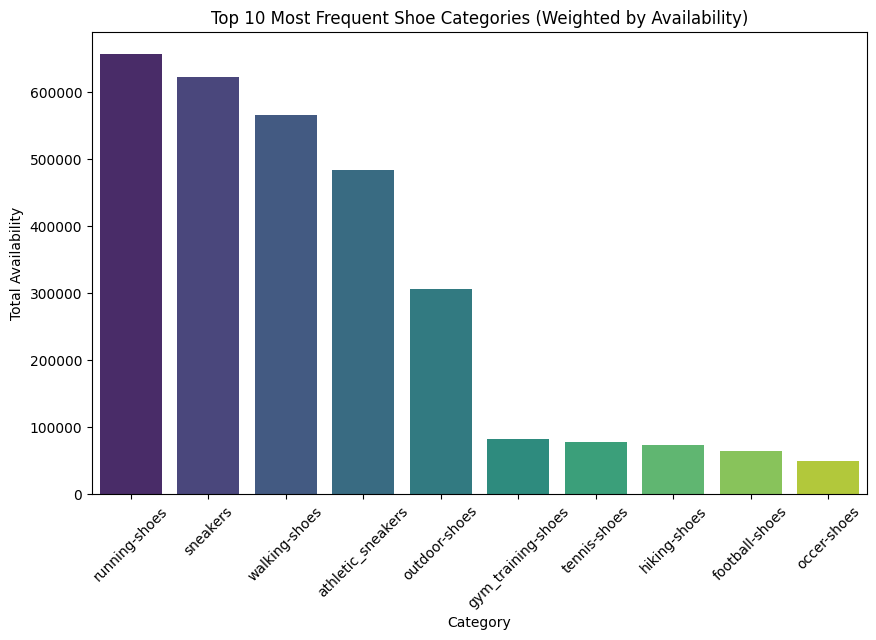

In [ ]:
top_n = 10
category_counts = category_weighted.head(top_n)

plt.figure(figsize=(10, 6))
sns.barplot(x=category_counts.index,
            y=category_counts.values,
            hue=category_counts.index,
            palette="viridis",
            legend=False)

plt.xticks(rotation=45)
plt.xlabel("Category")
plt.ylabel("Total Availability")
plt.title(f"Top {top_n} Most Frequent Shoe Categories (Weighted by Availability)")

plt.show()


In [ ]:
category_precentage = shoes_fact['category'].value_counts(normalize=True) * 100
print(category_precentage)

category
running-shoes         27.694915
sneakers              24.962227
outdoor-shoes         14.813007
walking-shoes         11.946944
athletic_sneakers     10.153231
tennis-shoes           3.273209
gym_training-shoes     3.113091
football-shoes         2.776812
occer-shoes            0.689607
hiking-shoes           0.576957
Name: proportion, dtype: float64


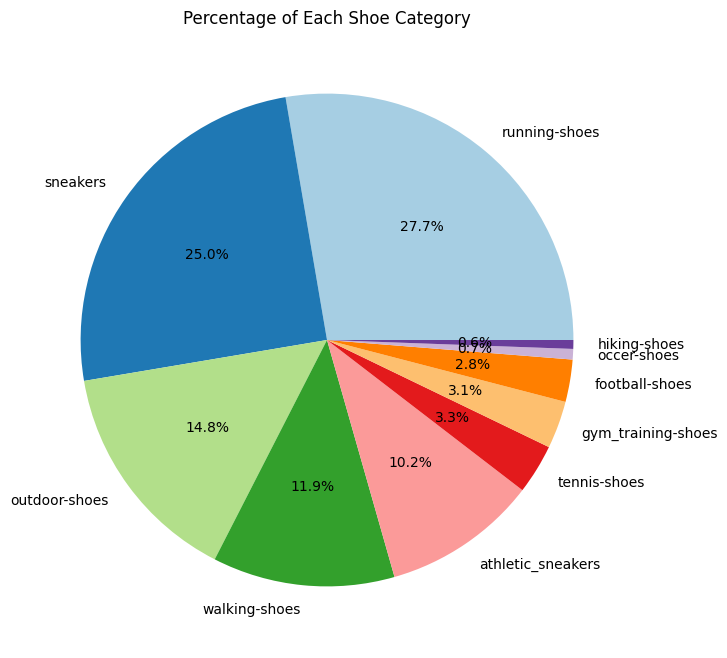

In [ ]:
categories = category_precentage.index.tolist()
percentages = category_precentage.values.tolist()

plt.figure(figsize=(8, 8))
plt.pie(percentages, labels=categories, autopct='%1.1f%%', colors=plt.cm.Paired.colors)
plt.title("Percentage of Each Shoe Category")
plt.show()


#### **Adidas Shoe Inventory Category Analysis**  

The Adidas shoe inventory is dominated by **running shoes**, which account for **27.69%** of the total proportion and have the highest weighted frequency at **656,736**. This indicates a strong focus on running as a key category.  

**Sneakers** follow closely, representing **24.96%** of the inventory with a weighted frequency of **623,278**, highlighting their popularity and broad appeal.  

**Outdoor shoes** and **walking shoes** also hold significant shares, with proportions of **14.81%** and **11.95%**, respectively, and weighted frequencies of **305,995** and **565,449**. This suggests a balanced emphasis on both outdoor activities and casual wear.  

Categories like **tennis shoes**, **gym training shoes**, and **football shoes** have smaller proportions, ranging from **3.27%** to **0.69%**, reflecting their niche appeal.  

Overall, the inventory distribution aligns with Adidas's positioning as a brand catering to both performance and lifestyle footwear, with a clear focus on **running shoes** and **sneakers** as the core categories.

### Question 2 - Does the Adidas webstore list a higher number of shoes for a specific gender (Men, Women, Kids, Unisex)?




In [ ]:
# Aggregate total availability per gender
gender_counts = shoes_fact['gender'].value_counts()
availability_per_gender = shoes_fact.groupby('gender')['availability'].sum().sort_values(ascending=False)

print("\nTotal Availability per Gender:")
print(availability_per_gender.to_string())



Total Availability per Gender:
gender
Unisex    758211
Women     431651
Kids      426602
Men       139133


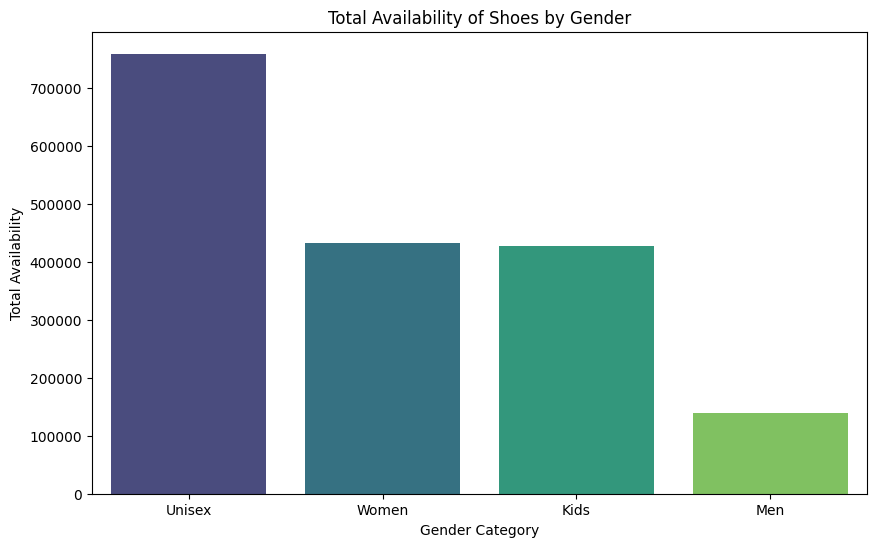

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(
    x=availability_per_gender.index,
    y=availability_per_gender.values,
    hue=availability_per_gender.index,
    palette="viridis",
    legend=False
)

plt.xlabel("Gender Category")
plt.ylabel("Total Availability")
plt.title("Total Availability of Shoes by Gender")
plt.show()


In [ ]:
# Calculate availability percentage per gender
availability_percentage = ((availability_per_gender / availability_per_gender.sum()) * 100).round(2)

# Print availability percentages
print("\nGender Percentage Distribution (Based on Availability):")
print(availability_percentage)


Gender Percentage Distribution (Based on Availability):
gender
Unisex    43.19
Women     24.59
Kids      24.30
Men        7.93
Name: availability, dtype: float64


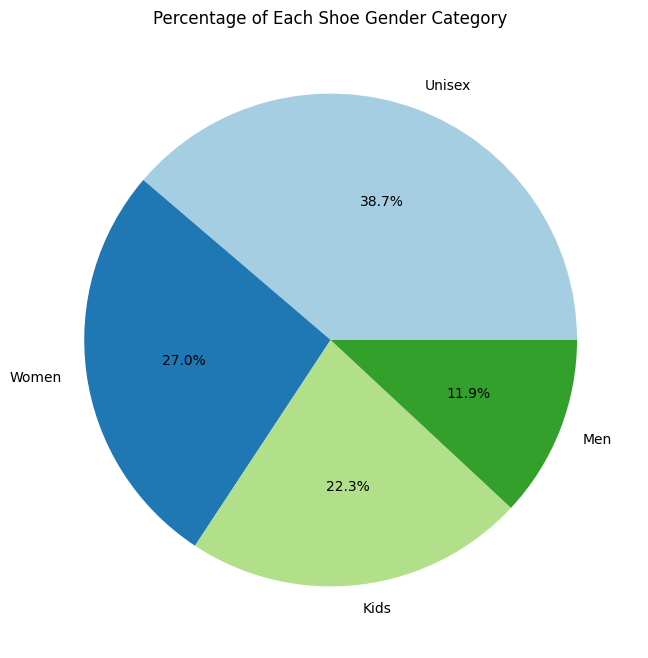

In [ ]:
plt.figure(figsize=(8, 8))
plt.pie(
    gender_counts,
    labels=gender_counts.index,
    autopct='%1.1f%%',
    colors=plt.cm.Paired(range(len(gender_counts)))
)

plt.title("Percentage of Each Shoe Gender Category")
plt.show()

#### **Gender-Based Shoe Inventory Analysis**

The Adidas webstore's shoe inventory distribution indicates that **Unisex shoes** make up the largest portion, with **758,211 entries (43.19%)**, suggesting that Adidas prioritizes versatile footwear that appeals to a broad audience.  

**Women's shoes** follow at **431,651 (24.59%)**, reflecting a significant focus on gender-specific designs for female consumers. Similarly, **Kids' shoes** account for **426,602 (24.30%)**, showing a strong market presence for children's footwear.  

**Men's shoes** represent the smallest share, with only **139,133 entries (7.93%)**, which is considerably lower than the other categories. This may indicate that Adidas places a stronger emphasis on unisex and women's footwear rather than exclusively male-oriented designs.  

Overall, the inventory distribution suggests that Adidas prioritizes **unisex and women's categories**, possibly due to broader market appeal, evolving consumer preferences, or strategic product positioning. However, further analysis, including sales data, would be necessary to determine if this distribution aligns with actual purchasing behavior.


### Question 3 - What are the most common "best for wear" categories?

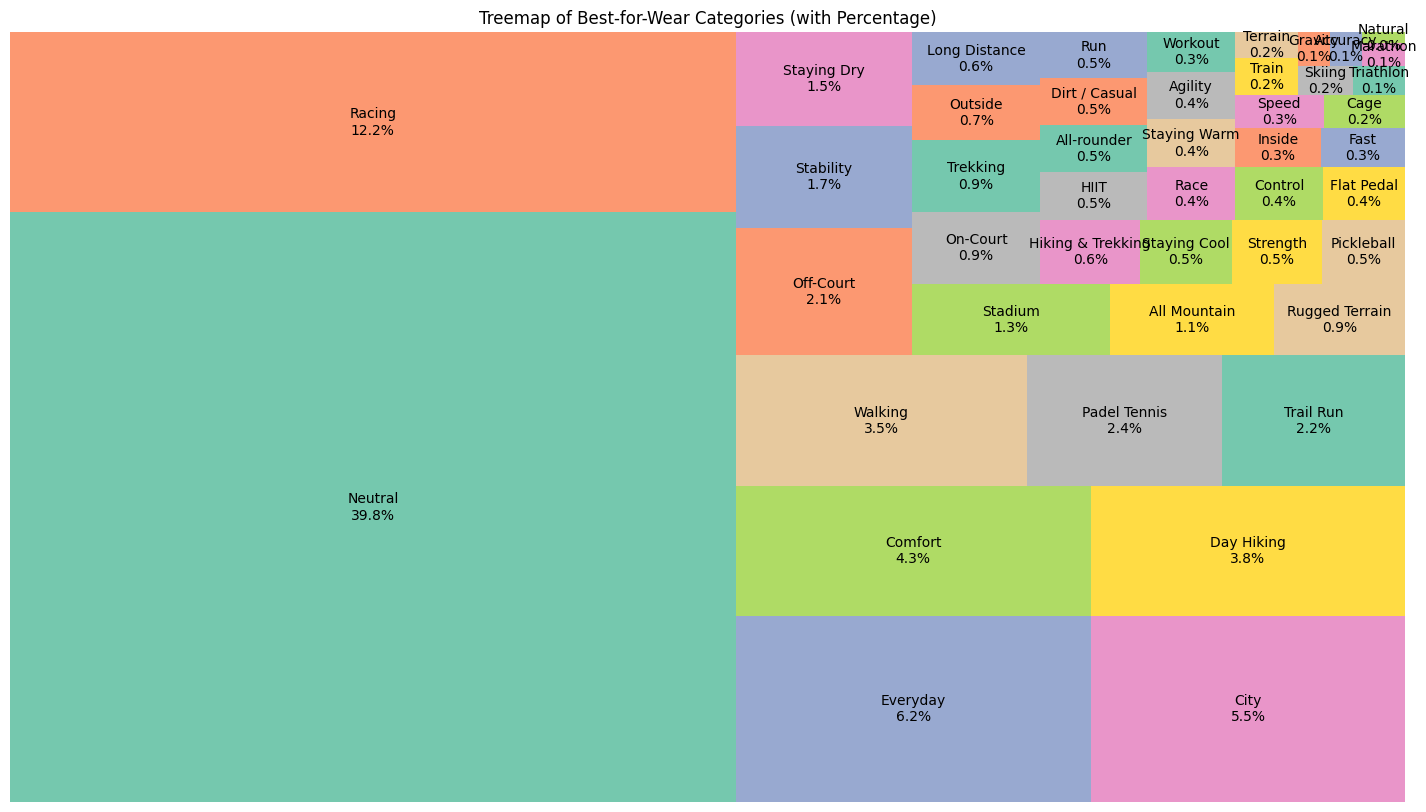

In [ ]:
best_for_wear_counts = shoes_fact["best_for_wear"].value_counts()

colors = sns.color_palette("Set2", len(best_for_wear_counts))

total = best_for_wear_counts.sum()
labels = [f"{label}\n{count/total:.1%}" for label, count in zip(best_for_wear_counts.index, best_for_wear_counts.values)]

plt.figure(figsize=(18, 10))
squarify.plot(
    sizes=best_for_wear_counts.values,
    label=labels,
    color=colors,
    alpha=0.9
)

plt.axis("off")
plt.title("Treemap of Best-for-Wear Categories (with Percentage)")
plt.show()

#### Best for Wear Category Analysis
The treemap shows that most Adidas shoes fall under the **"Neutral"** category, making up nearly **40%** of the dataset, indicating a strong preference for versatile footwear. **"Racing"** shoes follow at **12.2%**, suggesting significant demand for performance running. Lifestyle-oriented categories like **Everyday (6.2%)**, **City (5.5%)**, and **Comfort (4.3%)** are also well-represented, reflecting a balance between casual and performance footwear.

Outdoor and walking shoes, such as **Day Hiking (3.8%)** and **Walking (3.5%)**, have a moderate presence, while sport-specific categories like **Padel Tennis (2.4%)** and **Trail Run (2.2%)** cater to niche markets. Smaller categories, including **Triathlon (0.2%)** and **Speed (0.3%)**, indicate Adidas' inclusion of specialized footwear, though in lower volumes.

This distribution suggests that **Neutral** shoes dominate the "Best-for-Wear" category, while other categories have relatively small shares. Since **Neutral** is disproportionately large, including it in modeling may introduce bias, making it less useful for prediction. The model could default to predicting "Neutral" too often, potentially reducing the effectiveness of distinguishing other categories.


### Question 4 - What is the most common 'size' in Adidas website

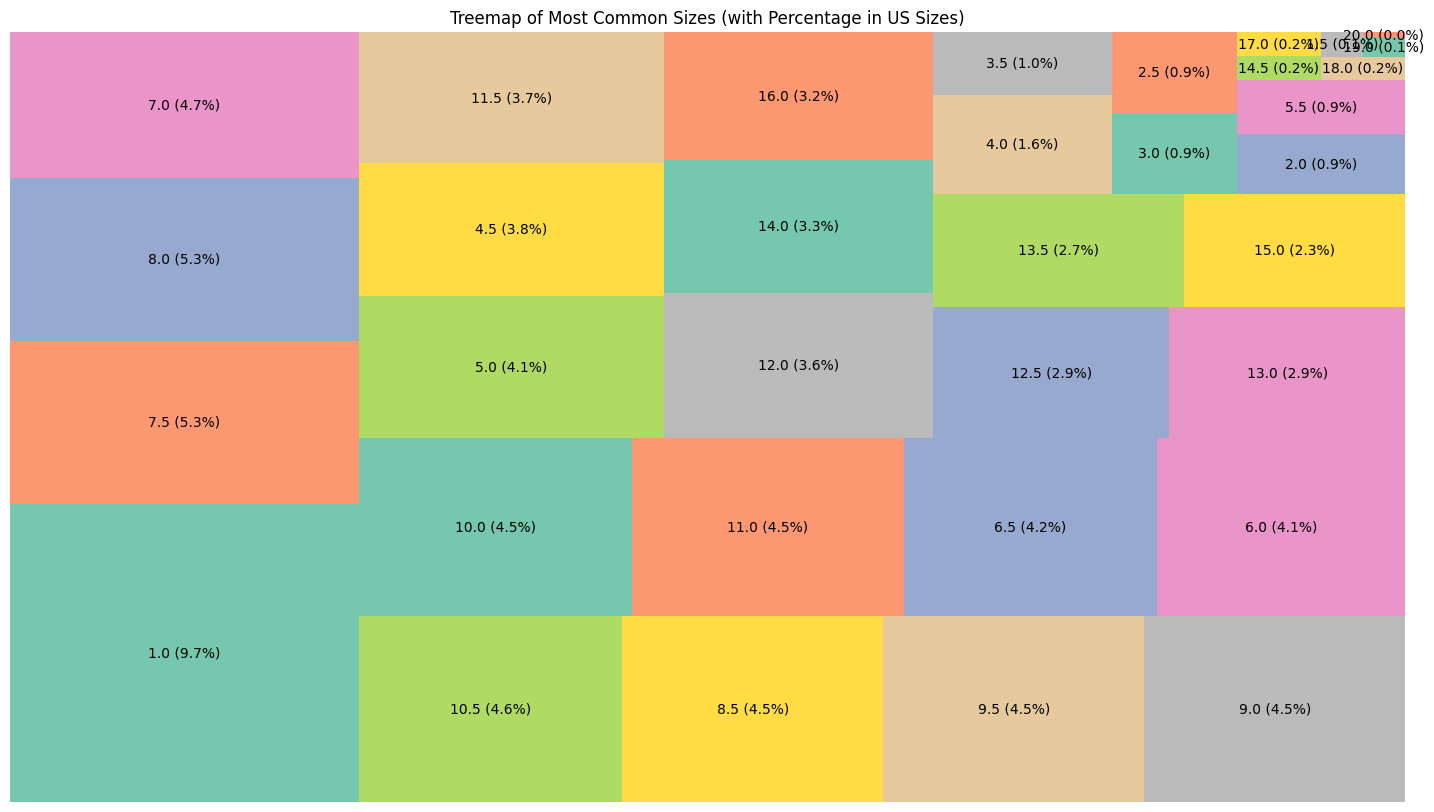

In [ ]:
most_common_size = shoes_fact["us_size"].value_counts()
colors = sns.color_palette("Set2", len(most_common_size))

total = most_common_size.sum()
labels = [f"{label} ({count/total:.1%})" for label, count in zip(most_common_size.index, most_common_size.values)]

# Plot the treemap
plt.figure(figsize=(18, 10))
squarify.plot(
    sizes=most_common_size.values,
    label=labels,
    color=colors,
    alpha=0.9
)

plt.axis("off")
plt.title("Treemap of Most Common Sizes (with Percentage in US Sizes)")
plt.show()

#### Common Size Anaylsis
With the treemap, we observed that the shoe sizes are fairly evenly distributed, with no significant skew toward any specific size. This balanced distribution is a positive aspect for analysis, as it suggests that the dataset is representative of a wide range of customer preferences. With sizes ranging from very small to very large, Adidas appears to cater to a diverse customer base, which is an ideal characteristic for making accurate predictions and insights without the risk of bias toward specific size categories.

The most common sizes, such as **1.0, 7.5, 8.0, and 7.0**, have relatively high frequencies, indicating they are preferred by a larger portion of the customer base. This insight could be valuable for inventory planning and marketing strategies, as it highlights the sizes that customers are most likely to purchase.

Additionally, the data appears to be of high quality, with minimal missing or malformed values, which is essential for conducting reliable analysis. The handling of size conversions across different metrics (such as US, UK, and EU) further ensures that the dataset is consistent and ready for analysis.

Overall, the balanced size distribution and diverse range of shoe sizes in the Adidas dataset suggest that it is well-suited for predictive modeling and other analyses. The absence of skewed data or overrepresented sizes means that models trained on this data are likely to be more robust and generalized, helping Adidas make informed decisions regarding inventory, customer preferences, and demand forecasting. This ensures that Adidas is likely meeting the needs of its broad customer base while remaining competitive in the market.


## Bivariate EDA


#### Question 1 - What is the relationship between Price and Gender?

A fairly common term is pink tax (the tendency for products marketed specifically toward women to be more expensive than those marketed toward men). It will be interesting to know if certain genders/categories of shoes are more expensive.

C:\Users\tamse\AppData\Local\Temp\ipykernel_2036\3974003706.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="gender", y="price", data=shoes_fact, palette="viridis")


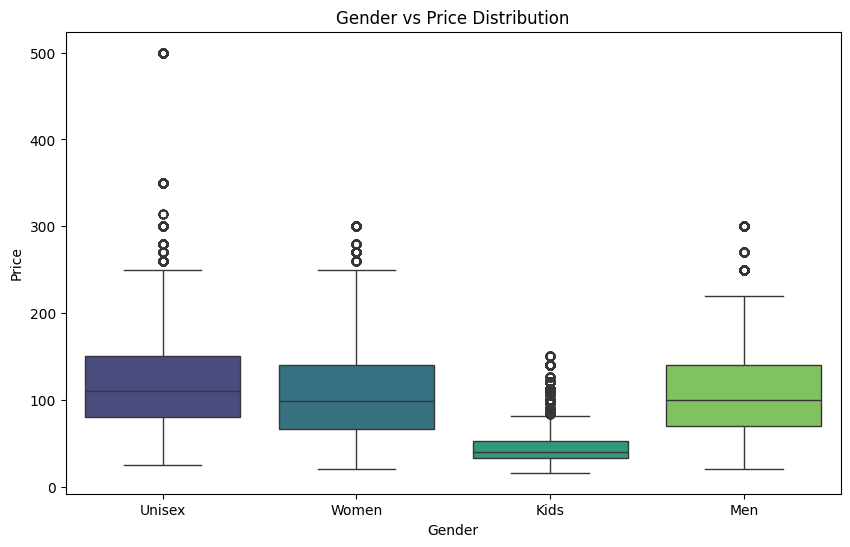

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x="gender", y="price", data=shoes_fact, palette="viridis")
plt.title("Gender vs Price Distribution")
plt.xlabel("Gender")
plt.ylabel("Price")
plt.show()


In [ ]:
shoes_fact.groupby("gender")["price"].agg(["mean", "median", "min", "max"])

,mean,median,min,max
gender,,,,
Kids,45.810432,40.0,16.0,150.0
Men,110.469714,100.0,20.0,300.0
Unisex,121.786368,110.0,25.0,500.0
Women,107.911476,99.0,20.0,300.0


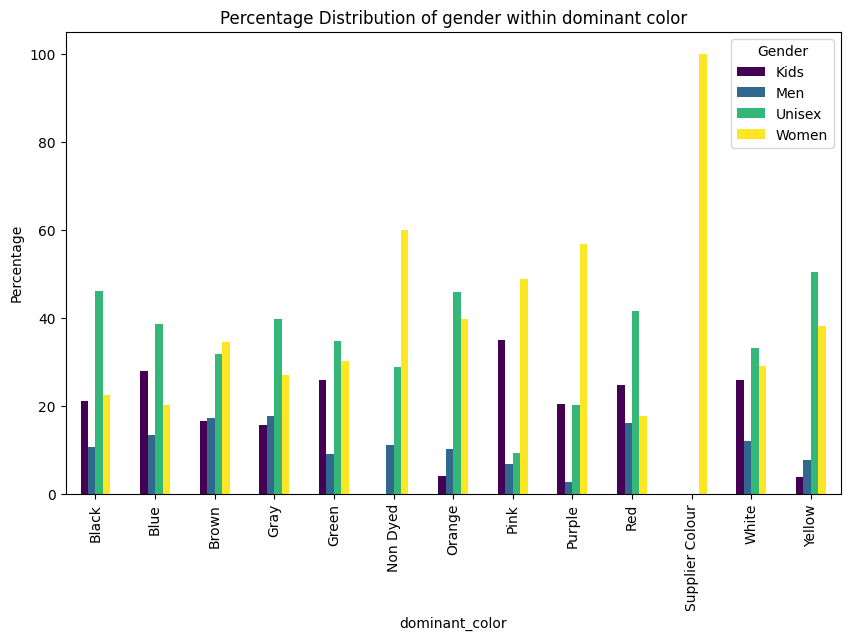

In [ ]:
category_percentage = pd.crosstab(shoes_fact["dominant_color"], shoes_fact["gender"], normalize="index") * 100


category_percentage.plot(figsize=(10,6),kind="bar", stacked=False, colormap="viridis")

plt.ylabel("Percentage")
plt.title("Percentage Distribution of gender within dominant color")
plt.legend(title="Gender")
plt.show()

In [ ]:
category_percentage

gender,Kids,Men,Unisex,Women
dominant_color,,,,
Black,21.008597,10.571143,46.046446,22.373815
Blue,27.917878,13.351274,38.491254,20.239594
Brown,16.496821,17.341695,31.730685,34.430799
Gray,15.714144,17.715270,39.644833,26.925753
Green,25.934516,9.024557,34.754434,30.286494
Non Dyed,0.000000,11.157025,28.925620,59.917355
Orange,4.071856,10.179641,45.928144,39.820359
Pink,35.026392,6.762275,9.281944,48.929390
Purple,20.333988,2.701375,20.284872,56.679764


##### Better Visualization

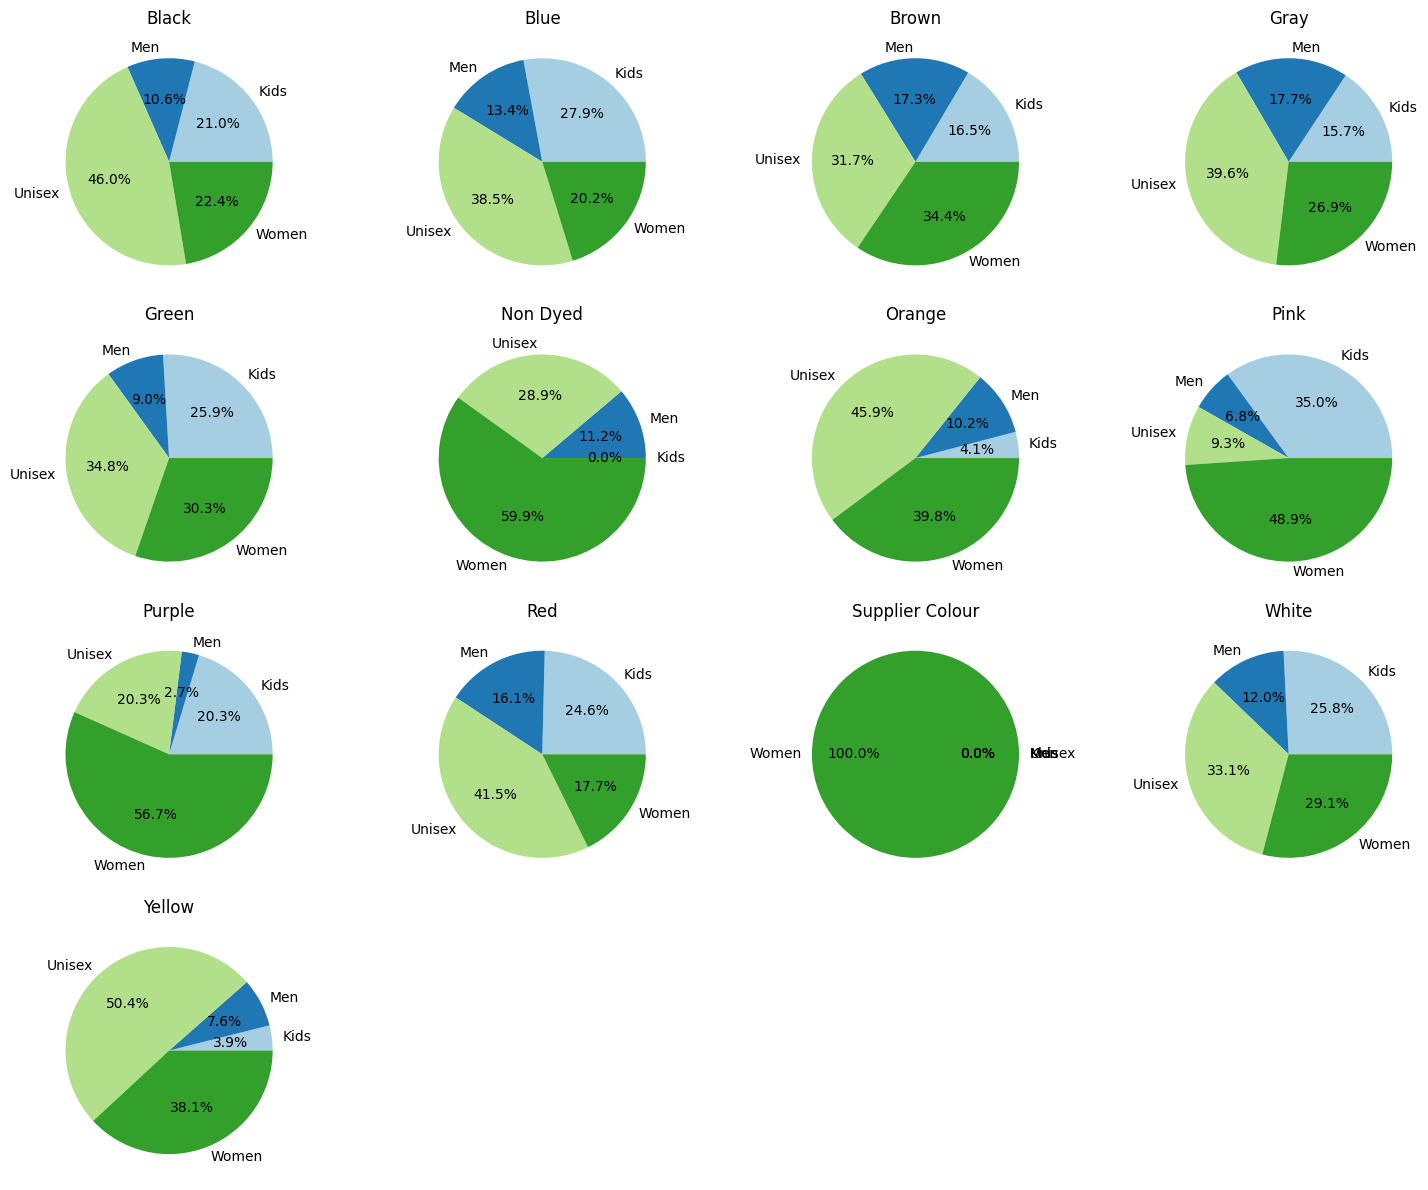

In [ ]:
num_colors = len(category_percentage)
cols = 4
rows = -(-num_colors // cols)
fig, axes = plt.subplots(rows, cols, figsize=(15, 3 * rows))

axes = axes.flatten()

# Create a pie chart for each dominant color
for i, (color, row) in enumerate(category_percentage.iterrows()):
    axes[i].pie(row, labels=row.index, autopct='%1.1f%%', colors=plt.cm.Paired.colors)  # Use Paired for distinct colors
    axes[i].set_title(color)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


The distribution of price and gender seem to have no strong relationship.

### Price and Gender Analysis

The analysis reveals **distinct preferences in dominant shoe colors across gender categories**. **Black** is the most common color across all groups, particularly in **unisex shoes (44.87%)** and **kids’ shoes (35.50%)**, indicating a strong general preference for neutral and versatile tones. **Men’s shoes** also favor **black (33.45%)**, while **women’s shoes** have a relatively lower proportion **(31.31%)**, but still prioritize neutral shades like **white and gray**.  

Bright and bold colors show **gender-specific trends**. **Pink and purple** are significantly more prominent in **women’s shoes (6.09% and 2.86%)** and **kids' shoes (5.26% and 1.24%)**, but are among the **least common for men (1.90% and 0.31%)**. Meanwhile, **brown and gray** appear more frequently in **men’s and unisex categories**, suggesting a preference for **earthy and muted tones** in those segments.  

**Non-dyed shoes** are almost exclusively found in **women's and unisex categories**, with **women’s shoes having the highest proportion (0.54%)**, likely due to **sustainable or minimalist designs**. Overall, the dominant color distribution suggests that **Adidas tailors its shoe colors based on consumer preferences**, with **unisex and kids' shoes incorporating more diverse colors**, while **men’s and women’s shoes lean toward more traditional color palettes**.  


#### Question 2 - How does Dominant Color relate to Gender

Some colors are often gendered. For example, pink is commonly thought of as a feminine color while blue is considered more of a masculine color. The dominant color may reveal a connection between color and gender.

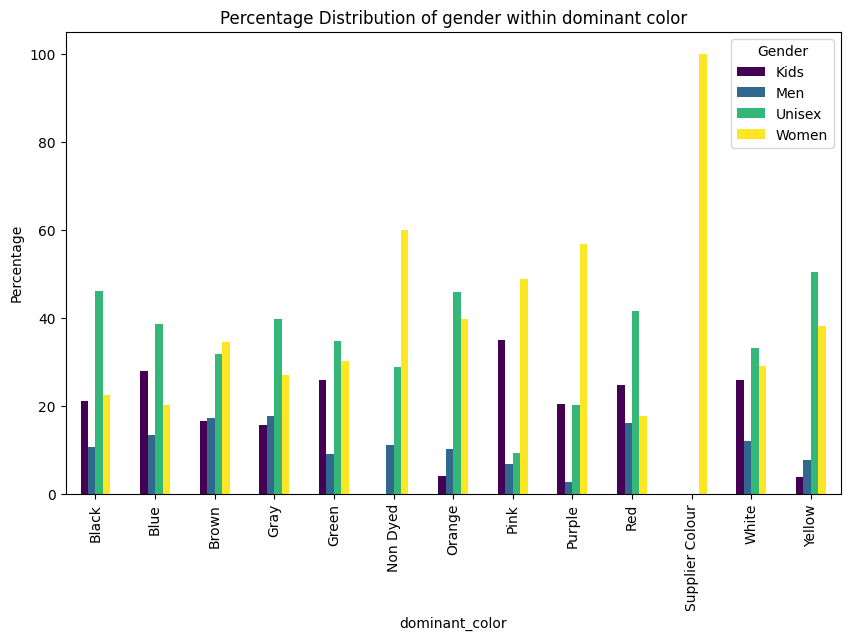

In [ ]:
category_percentage = pd.crosstab(shoes_fact["dominant_color"], shoes_fact["gender"], normalize="index") * 100


category_percentage.plot(figsize=(10, 6),kind="bar", stacked=False, colormap="viridis")

plt.ylabel("Percentage")
plt.title("Percentage Distribution of gender within dominant color")
plt.legend(title="Gender")
plt.show()

In most of the categories, shoes labelled as unisex or women tend to occupy the largest percentage of shoes that consist of the color. Interestingly enough, pink and purple were dominated by women.  

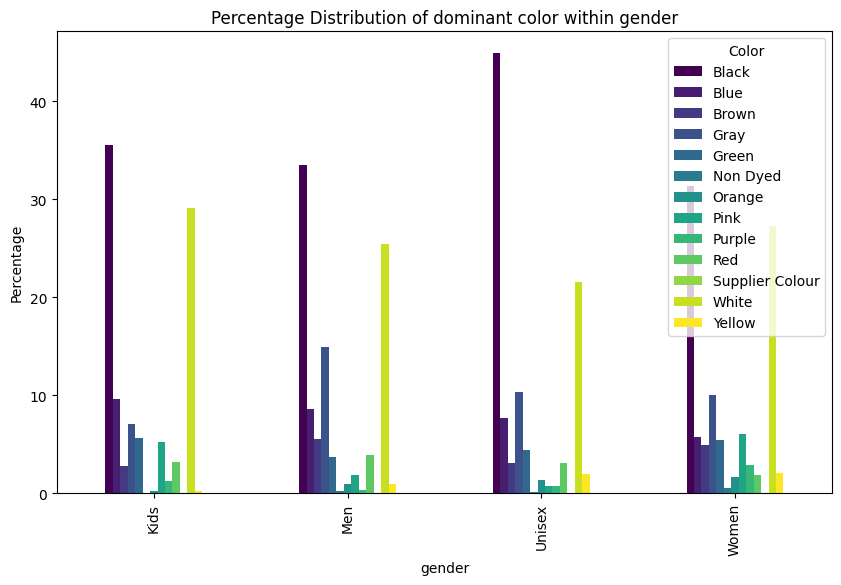

In [ ]:
category_percentage = pd.crosstab(shoes_fact["gender"], shoes_fact["dominant_color"], normalize="index") * 100


category_percentage.plot(figsize=(10, 6),kind="bar", stacked=False, colormap="viridis")

plt.ylabel("Percentage")
plt.title("Percentage Distribution of dominant color within gender")
plt.legend(title="Color")
plt.show()

In [ ]:
category_percentage

dominant_color,Black,Blue,Brown,Gray,Green,Non Dyed,Orange,Pink,Purple,Red,Supplier Colour,White,Yellow
gender,,,,,,,,,,,,,
Kids,35.496417,9.621685,2.833251,7.095095,5.687445,0.000000,0.203444,5.261111,1.238612,3.165343,0.000000,29.134318,0.263280
Men,33.454749,8.618661,5.578593,14.981788,3.706921,0.226954,0.952648,1.902494,0.308210,3.883441,0.000000,25.430092,0.955450
Unisex,44.870158,7.650764,3.142956,10.323527,4.395652,0.181175,1.323441,0.804072,0.712622,3.079113,0.000000,21.559831,1.956691
Women,31.312030,5.777690,4.897964,10.069759,5.501382,0.538987,1.647936,6.087452,2.859727,1.885834,0.064431,27.233078,2.123732


##### Better Visualization

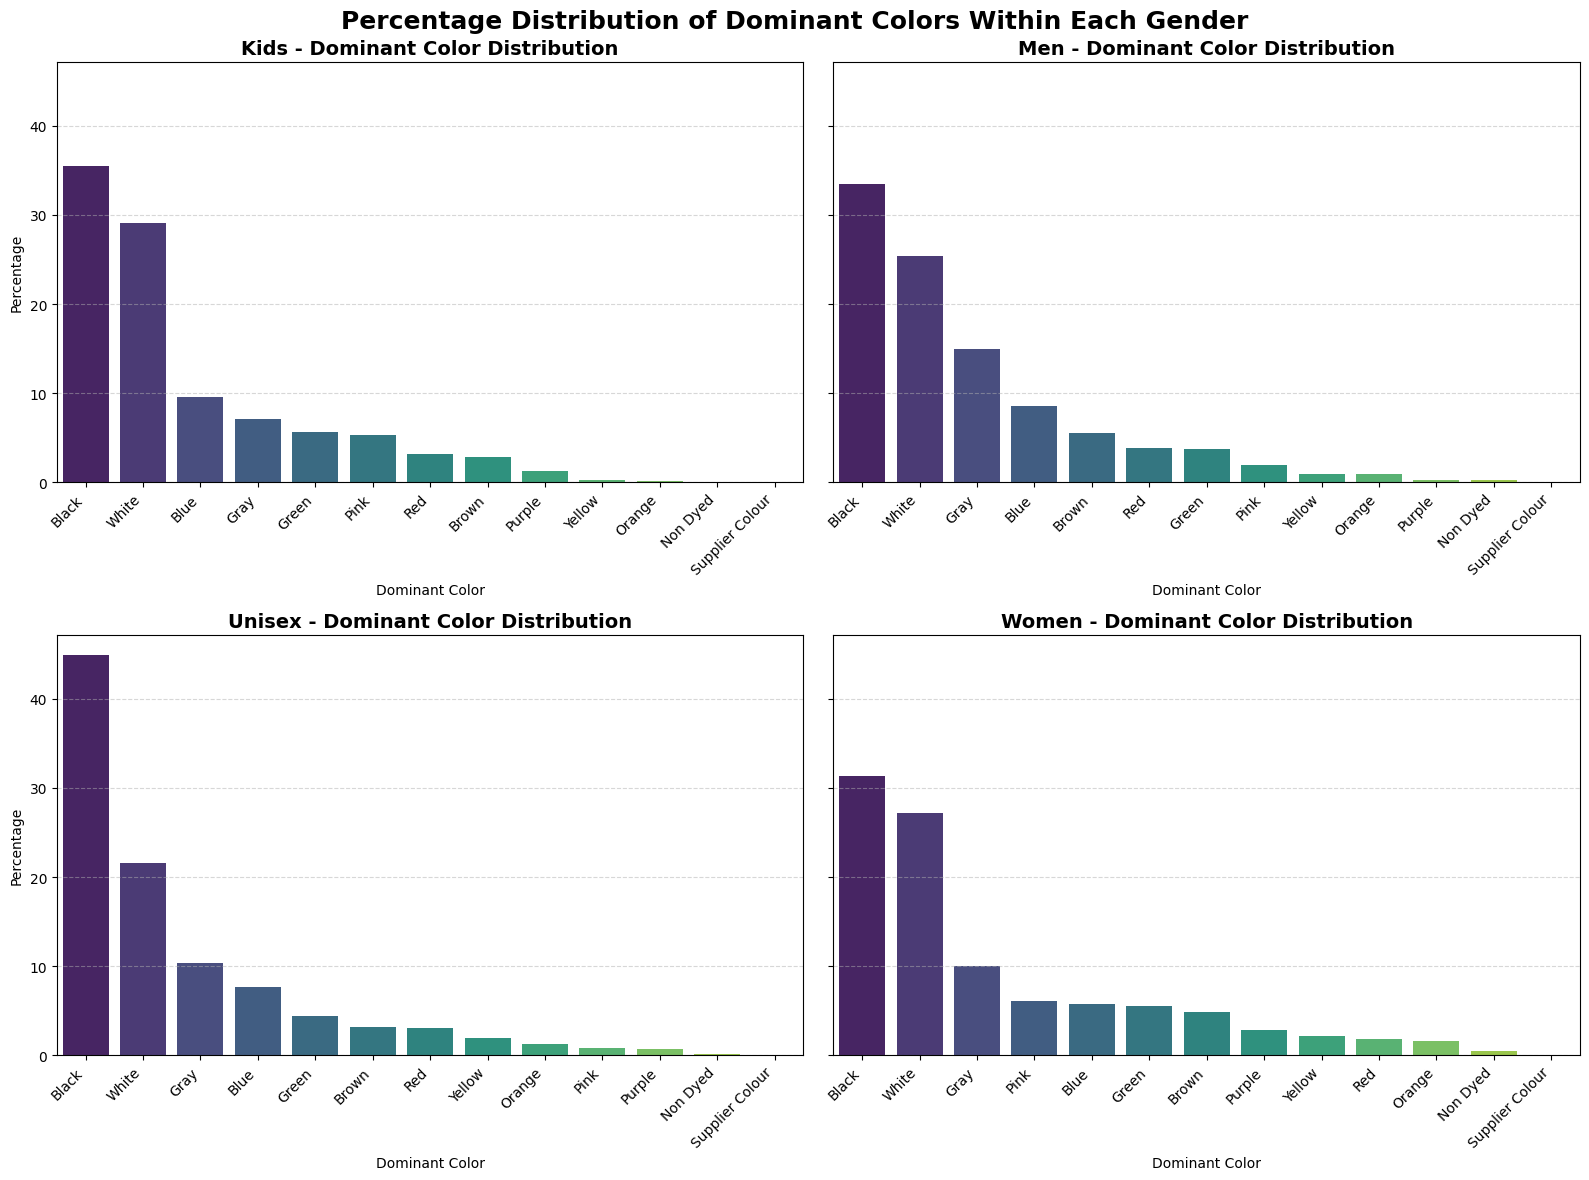

In [ ]:
category_percentage = pd.crosstab(shoes_fact["gender"], shoes_fact["dominant_color"], normalize="index") * 100
category_percentage = category_percentage.apply(lambda x: x.sort_values(ascending=False), axis=1)  # Sort within each gender

num_genders = len(category_percentage)

fig, axes = plt.subplots(2, 2, figsize=(16, 12), sharey=True)
axes = axes.flatten()


for i, (gender, row) in enumerate(category_percentage.iterrows()):
    sorted_row = row.sort_values(ascending=False)

    sns.barplot(
        x=sorted_row.index,
        y=sorted_row.values,
        ax=axes[i],
        hue=sorted_row.index,
        palette=sns.color_palette("viridis", len(sorted_row)),
        legend=False
    )

    axes[i].set_title(f"{gender} - Dominant Color Distribution", fontsize=14, fontweight="bold")
    axes[i].set_ylabel("Percentage")
    axes[i].set_xlabel("Dominant Color")

    axes[i].set_xticks(range(len(sorted_row.index)))
    axes[i].set_xticklabels(sorted_row.index, rotation=45, ha="right")
    axes[i].grid(axis="y", linestyle="--", alpha=0.5)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.suptitle("Percentage Distribution of Dominant Colors Within Each Gender", fontsize=18, fontweight="bold")
plt.tight_layout()
plt.show()

### Dominant Colors and Gender Analysis3

**Women’s shoes exhibit the highest diversity in dominant colors.** Unlike other categories, where **black dominates**, **women’s shoes display a more balanced distribution across colors**. While **black (22.37%)** and **white (27.23%)** are still prevalent, significant proportions of shoes are also found in **gray (10.07%)**, **pink (6.09%)**, **purple (2.86%)**, and even less common colors like **yellow (2.12%)**. This suggests that **Adidas offers a wider range of color choices for women’s footwear**, possibly to cater to **varying fashion trends and personal preferences**.  

**Unisex shoes** also show **considerable diversity**, particularly in colors like **black (46.05%)**, **gray (39.64%)**, and **red (41.53%)**. This category may include shoes that appeal to **multiple demographics**, allowing for **broader color variations**.  

On the other hand, **men’s shoes** are **less diverse**, with a strong emphasis on **black (10.57%)**, **gray (17.72%)**, and **brown (17.34%)**, reinforcing a preference for **neutral and muted tones**. **Kids' shoes** tend to have a more **balanced mix of colors**, but still show a notable concentration in a few dominant shades like **black, blue, and pink**.  

Overall, the data suggests that **Adidas strategically diversifies its color offerings**, with **women’s and unisex categories featuring the widest variety of dominant colors** to appeal to **different fashion preferences and consumer demands**.

All gender labels had a trend of black and white being most common. Gray is the next most common color for most of the labels except kids. Blue and brown are also relatively high up in frequency.

### Question 3 - What is the relationship between Dominant Color and Sub-Colors (Sub_Color1, Sub_Color2)?

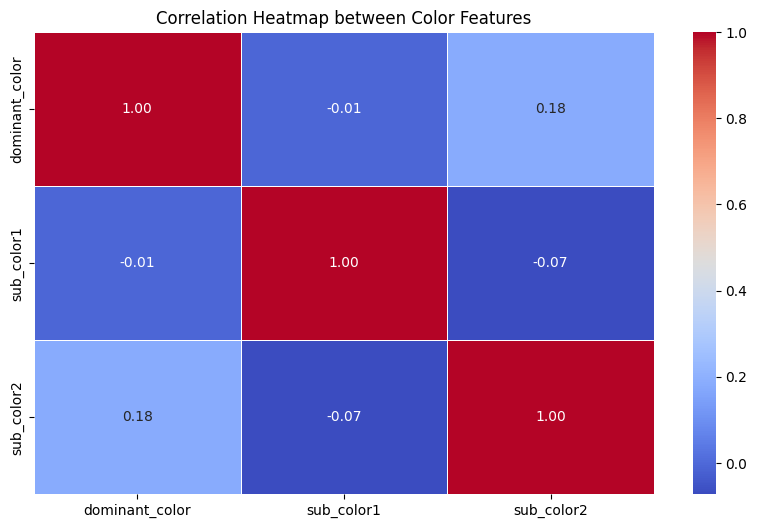

In [53]:
shoes_fact['dominant_color'] = shoes_fact['dominant_color'].astype('category').cat.codes
shoes_fact['sub_color1'] = shoes_fact['sub_color1'].astype('category').cat.codes
shoes_fact['sub_color2'] = shoes_fact['sub_color2'].astype('category').cat.codes

color_columns = ['dominant_color', 'sub_color1', 'sub_color2']
correlation_matrix = shoes_fact[color_columns].corr()

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap between Color Features')
plt.show()


#### Relationship between Dominant Color and Sub-Colors Analysis

The heatmap illustrates the correlation between the **dominant color** and two **sub-colors**, revealing the relationships between these color features. The correlation between the **dominant color** and **sub color 1** is **-0.01**, indicating a very weak negative linear relationship, suggesting that changes in the dominant color have almost no discernible impact on sub color 1. The correlation between the **dominant color** and **sub color 2** is **0.18**, showing a weak positive linear relationship, indicating a slight tendency for the colors to change in the same direction, but with a limited degree of association. Lastly, the correlation between **sub color 1** and **sub color 2** is **-0.07**, revealing a very weak negative linear relationship, demonstrating a near-absence of a linear relationship.

The consistently low correlation values, all close to **zero**, suggest that the **dominant color** and the two **sub-colors** are relatively independent of each other, implying that each color feature likely captures unique information about the analyzed data and that knowing the value of one color provides little predictive power for the others. This **independence of color features** suggests they could be valuable inputs for further analysis, such as improving the performance of predictive models by providing distinct information or enhancing image classification by leveraging the unique color characteristics.

In conclusion, the weak correlations highlight the distinct nature of these color features, making them potentially useful for subsequent analytical work.




### Question 4 - How does the shoe category (e.g., running, sneakers, outdoor, etc.) relate to the availability of shoes?


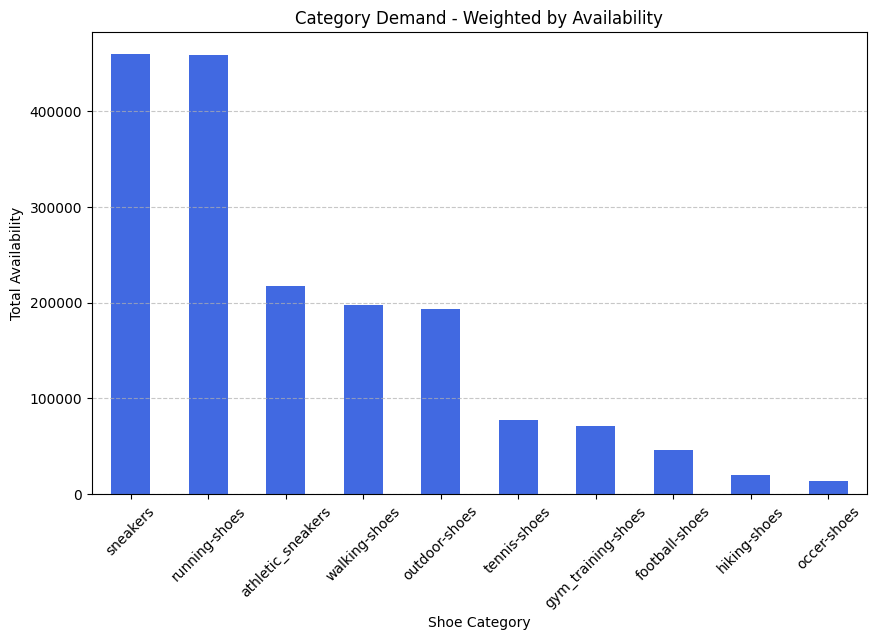

In [54]:
# Aggregate total availability per shoe category
category_demand = shoes_fact.groupby('category')['availability'].sum().sort_values(ascending=False)

# Plot category demand
plt.figure(figsize=(10, 6))
category_demand.plot(kind='bar', color='royalblue')
plt.title('Category Demand - Weighted by Availability')
plt.xlabel('Shoe Category')
plt.ylabel('Total Availability')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


### Shoe Category and Availability relationship Analysis


The analysis of category demand reveals interesting insights into consumer preferences. **Sneakers** and **Running Shoes** are the most popular categories, with a substantial availability of **459,453** and **458,131** units, respectively. These two categories make up the majority of the stock, indicating that these types of footwear have a broad appeal, possibly due to their versatility and popularity for both casual wear and athletic activities. On the other hand, categories like **Soccer Shoes** and **Hiking Shoes** have significantly lower availability, with only **14,057** and **20,470** units, respectively. This suggests that these products cater to more niche markets or have a smaller, but specialized consumer base.

### Question 5 - Is there a relationship between the country and the number of shoes available or out of stock?


C:\Users\tamse\AppData\Local\Temp\ipykernel_2036\4029706208.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=country_trends.index, y=country_trends.values, palette='coolwarm')


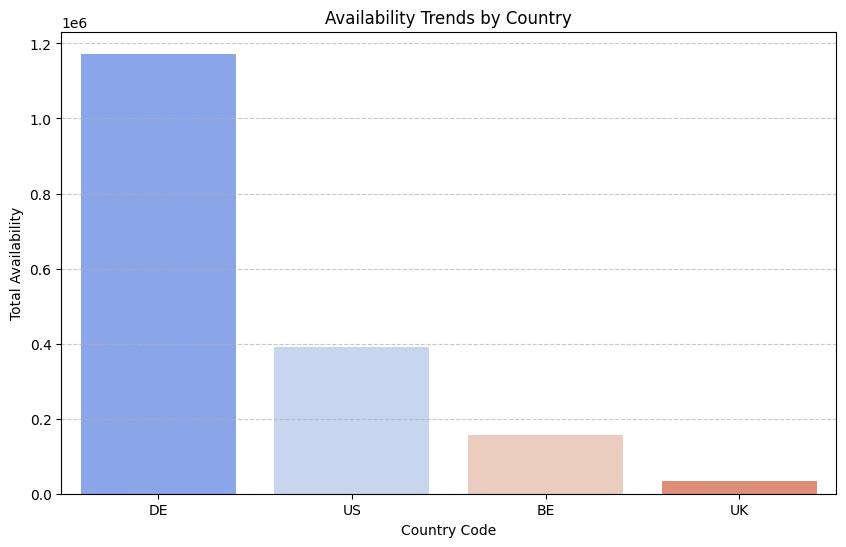

In [55]:
# Analyze country-based availability trends
country_trends = shoes_fact.groupby('country_code')['availability'].sum().sort_values(ascending=False)

# Plot country-based trends
plt.figure(figsize=(10, 6))
sns.barplot(x=country_trends.index, y=country_trends.values, palette='coolwarm')
plt.title('Availability Trends by Country')
plt.xlabel('Country Code')
plt.ylabel('Total Availability')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


### Country and Availability relationship Analysis


When looking at country-based availability, we see a clear regional variation in Adidas' stock levels. **Germany** leads with a significant availability of **1,172,567** units, which could reflect a strong market presence or higher demand in the region. The **United States**, while still a major market, has a lower stock of **390,776** units, which might indicate that the product demand is spread across a larger and more diverse range of categories or that regional stock management is more varied. **Belgium** and the **United Kingdom** have considerably lower availability, with **157,191** and **35,063** units, respectively. This might suggest that Adidas has a smaller footprint in these regions, or the demand for footwear is not as high as in Germany or the United States. These differences highlight Adidas' targeted inventory strategy, where stock levels are optimized based on regional market demand and the popularity of specific product categories.


# Approach and Methodology



### Exploratory Data Analysis (EDA) Insights and Interpretation

The EDA provided insights into how the data is distributed. This helped us identify which features are most relevant for modeling and which ones might introduce bias or unnecessary complexity.

Based on our **Exploratory Data Analysis (EDA)**, we concluded that **availability is not necessarily related to sales performance**. The availability of a shoe does not directly indicate its sales rate or popularity. **Availability** can be influenced by factors like stock management, production cycles, seasonal trends, and demand forecasting.

We refined our goal to **predict the availability of a shoe** based on key features that may affect stock levels. Our model will focus on forecasting the **likelihood of a shoe being available**.

### **Objective Refinement:**
From the above, we concluded that the primary objective is to **predict the availability** of a shoe given various features and characteristics of the shoe itself. These features are expected to help determine if a shoe will likely be **in stock** or **out of stock**.




## Feature Selection

### Feature to Include (Decision Influence)

| Feature          | Reason for Inclusion |
|-----------------|----------------------|
| `price`         | Shoe affordability impacts purchasing decisions. |
| `category`      | Shoe type plays a key role in consumer preferences. |
| `us_size`          | Availability varies by size, influencing stock levels. |
| `gender`        | Men's and women's shoe preferences may differ. |
| `dominant_color` | Certain colors might be more popular and sell out faster. |
| `sub_color1`, `sub_color2` | These features are independent from the dominant color and are not correlated. |



Other features were excluded due to redundancy, bias risk, or limited predictive power.

### Features to Exclude (Decision Influence)

| Feature         | Reason for Exclusion |
|----------------|----------------------|
| `id`           | Unique identifier, not useful for prediction. |
| `SN`           | Likely just a serial number, no predictive power. |
| `name`         | Too specific and not generalizable. |
| `currency`     |  Prices are standardized to euro, this is now unnecessary. |
| `country_code` | Initially considered for feature selection, but excluded as the objective of the analysis is global, making regional availability irrelevant. |
| `best_for_wear` | Since the "Neutral" category dominates, including it may introduce bias into the model. |


# Modeling

## **Chosen Model:**

1. **Random Forest** - We chose the **Random Forest** model due to its decision-tree-based structure, which aligns well with how consumers evaluate multiple features when selecting a shoe. Unlike linear models, **Random Forest can capture complex interactions** between categorical and numerical features, making it suitable for this type of prediction.

    **Advantages of Random Forest for this dataset:**
    - **Handles mixed data types well** (categorical and numerical).  
    - **Robust to outliers and missing values**, which may exist in the dataset.  
    - **Medium-speed performance** while maintaining **moderate to high accuracy** for structured data.  

    While other models, such as decision trees, might provide similar interpretability, **Random Forest offers improved generalization** due to its ensemble nature, reducing the risk of overfitting.








## Random Forest

### Feature Selection and Ecoding


In [56]:
processed_shoes = shoes_fact.copy()

categorical_columns = ['category', 'gender', 'dominant_color',
                       'sub_color1', 'sub_color2', 'us_size']  # Removed excluded columns

exclude_columns = ['date','availability', 'currency', 'country_code', 'name', 'best_for_wear', 'SN', 'id']

label_encoder = LabelEncoder()

for col in categorical_columns:
    processed_shoes[col] = processed_shoes[col].fillna('unknown')
    processed_shoes[col] = label_encoder.fit_transform(processed_shoes[col].astype(str))

if 'availability' in processed_shoes.columns:
    # Define X and y
    X = processed_shoes.drop(columns=exclude_columns, errors='ignore')
    y = processed_shoes['availability']


### Iniitial Model Training

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(f"Training set size: {X_train.shape}")
print(f"Test set size: {X_test.shape}")

# Train Random Forest model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Model Evaluation
accuracy = rf.score(X_test, y_test)
print(f"\nModel Accuracy: {accuracy:.4f}")

y_pred = rf.predict(X_test)
print(f"\nClassification Report:\n{classification_report(y_test, y_pred)}")

Training set size: (209409, 7)
Test set size: (89747, 7)

Model Accuracy: 0.7912

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.93      0.90     40627
           1       0.48      0.36      0.41      5114
           2       0.43      0.34      0.38      2668
           3       0.41      0.34      0.37      1933
           4       0.44      0.35      0.39      1667
           5       0.41      0.34      0.37      1393
           6       0.43      0.30      0.35      1246
           7       0.47      0.37      0.42      1246
           8       0.45      0.35      0.39      1157
           9       0.44      0.36      0.40      1114
          10       0.44      0.37      0.40      1022
          11       0.36      0.27      0.31       843
          12       0.41      0.34      0.37       824
          13       0.45      0.37      0.41       761
          14       0.37      0.28      0.32       701
          15       0.88      0

The **classification report** shows a **weighted average** precision of **0.77**, which suggests a well-fitting model that is neither overfitting nor underfitting. The model’s overall **accuracy** of **0.7912** indicates a high level of performance in classifying the data. However, there is still room for improvement, particularly in the **recall** and **precision** for certain classes. To further enhance model performance, we will proceed with **hyperparameter tuning** to explore potential gains and refine the model even further. This additional step could lead to better handling of the underperforming classes and improve overall classification efficiency.


### Hyperparamter Tuning (Optimization using RandomizeSearchCV)

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

param_dist = {
    'n_estimators': [50, 100, 200, 300, 400],
    'max_depth': [None, 10, 20, 30, 40],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None],
    'bootstrap': [True, False]
}

rf = RandomForestClassifier(random_state=42)

# Perform Randomized Search with Cross Validation
random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=30,
    cv=5,
    verbose=2,
    n_jobs=-1,
    random_state=42
)

random_search.fit(X_train, y_train)
best_params = random_search.best_params_
best_model = random_search.best_estimator_

print("Best Hyperparameters:", best_params)

best_accuracy = best_model.score(X_test, y_test)
print(f"\nBest Model Accuracy: {best_accuracy:.4f}")


Fitting 5 folds for each of 30 candidates, totalling 150 fits
Best Hyperparameters: {'n_estimators': 400, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': None, 'bootstrap': True}

Best Model Accuracy: 0.7919


For the hyperparameter tuning, we observed a very small increase in accuracy—only **0.0007%**, which is nearly negligible. This suggests that the model is already optimized to the best extent possible given our **computational constraints**. Due to **computing power limitations**, we were unable to further refine the hyperparameters beyond what was feasible within our available resources. The **RandomizedSearchCV** hyperparameter tuning was executed within **5 minutes**, but increasing the number of iterations and expanding the parameter search space would have significantly prolonged the tuning process, making it impractical to implement within our constraints.


### Retraining Optimized Random Forest Model

In [58]:
from sklearn.ensemble import RandomForestClassifier

rf_best = RandomForestClassifier(
    n_estimators=400,
    min_samples_split=2,
    min_samples_leaf=1,
    max_features='log2',
    max_depth=None,
    bootstrap=True,
    random_state=42
)

rf_best.fit(X_train, y_train)

best_accuracy = rf_best.score(X_test, y_test)
print(f"Best Model Accuracy: {best_accuracy:.4f}")

y_pred = rf.predict(X_test)
print(f"\nClassification Report:\n{classification_report(y_test, y_pred)}")

Best Model Accuracy: 0.7919

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.93      0.90     40627
           1       0.48      0.36      0.41      5114
           2       0.43      0.34      0.38      2668
           3       0.41      0.34      0.37      1933
           4       0.44      0.35      0.39      1667
           5       0.41      0.34      0.37      1393
           6       0.43      0.30      0.35      1246
           7       0.47      0.37      0.42      1246
           8       0.45      0.35      0.39      1157
           9       0.44      0.36      0.40      1114
          10       0.44      0.37      0.40      1022
          11       0.36      0.27      0.31       843
          12       0.41      0.34      0.37       824
          13       0.45      0.37      0.41       761
          14       0.37      0.28      0.32       701
          15       0.88      0.94      0.91     27431

    accuracy                

### Feature Importance using Random Forest

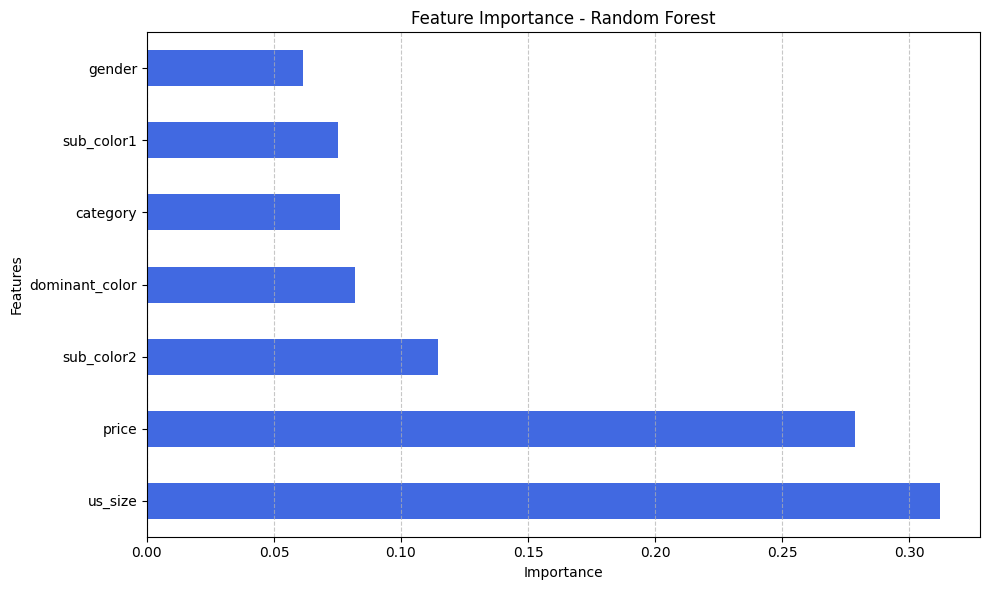

In [59]:
feature_importances = pd.Series(rf.feature_importances_, index=X.columns)
sorted_feature_importances = feature_importances.sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sorted_feature_importances.plot(kind='barh', color='royalblue')
plt.title('Feature Importance - Random Forest')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


## Linear Regression

### Category Demand Analysis and Country-Based Availability Trends for Linear Regression

### Feature Selection and Modelling

In [60]:
# Stock Forecasting - Predicting time until stockout
shoes_fact['days_since_listed'] = (pd.to_datetime('today') - pd.to_datetime(shoes_fact['date'], dayfirst=True)).dt.days
shoes_fact['days_until_stockout'] = shoes_fact['availability'] / (shoes_fact['days_since_listed'] + 1)  # Avoid division by zero

# Prepare dataset for modeling
features = ['category', 'price', 'country_code', 'availability', 'days_since_listed']
target = 'days_until_stockout'

# Convert categorical features to numerical using one-hot encoding
df_model = pd.get_dummies(shoes_fact[features + [target]], columns=['category', 'country_code'], drop_first=True)

# Train-test split
X = df_model.drop(columns=[target])
y = df_model[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train Linear Regression Model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Model Evaluation
y_pred = lr_model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae:.2f} days")
print(f"R-squared Score: {r2:.4f}")

# Predict top 10 fastest-moving shoes
shoes_fact['predicted_days_until_stockout'] = lr_model.predict(X)
fast_moving = shoes_fact[['id', 'category', 'name', 'predicted_days_until_stockout']].sort_values(by='predicted_days_until_stockout', ascending=True).head(10)

print("Top 10 Fastest Moving Shoes (Predicted):")
print(fast_moving.to_string(index=False))

Mean Absolute Error: 0.00 days
R-squared Score: 0.9987
Top 10 Fastest Moving Shoes (Predicted):
    id           category                         name  predicted_days_until_stockout
IH8232 gym_training-shoes Adipower 3 Gewichtheberschuh                      -0.004732
GY8926 gym_training-shoes Adipower 3 Gewichtheberschuh                      -0.004732
GY8926 gym_training-shoes Adipower 3 Gewichtheberschuh                      -0.004732
IH8232 gym_training-shoes Adipower 3 Gewichtheberschuh                      -0.004732
GY8926 gym_training-shoes Adipower 3 Gewichtheberschuh                      -0.004732
GY8926 gym_training-shoes Adipower 3 Gewichtheberschuh                      -0.004732
IH8233 gym_training-shoes Adipower 3 Gewichtheberschuh                      -0.004732
IH8233 gym_training-shoes Adipower 3 Gewichtheberschuh                      -0.004732
IH8233 gym_training-shoes Adipower 3 Gewichtheberschuh                      -0.004732
IH8233 gym_training-shoes Adipower 3 Gewicht

### Predicting Fast Moving Product per Category

In [61]:
# Compute the average predicted days until stockout per category
fastest_categories = shoes_fact.groupby('category')['predicted_days_until_stockout'].mean().reset_index()

# scale
fastest_categories['predicted_days_until_stockout'] *= 50

# Sort categories by the fastest stockout time
fastest_categories = fastest_categories.sort_values(by='predicted_days_until_stockout', ascending=True)

print("Fastest Moving Categories (Predicted):")
print(fastest_categories.to_string(index=False))

Fastest Moving Categories (Predicted):
          category  predicted_days_until_stockout
     outdoor-shoes                       2.679295
     running-shoes                       3.414173
     walking-shoes                       3.422577
    football-shoes                       3.507960
          sneakers                       3.798307
       occer-shoes                       4.427504
 athletic_sneakers                       4.581248
gym_training-shoes                       4.684732
      tennis-shoes                       4.866997
      hiking-shoes                       7.653395


### Feature Importance and Visualization of Stockout Trend

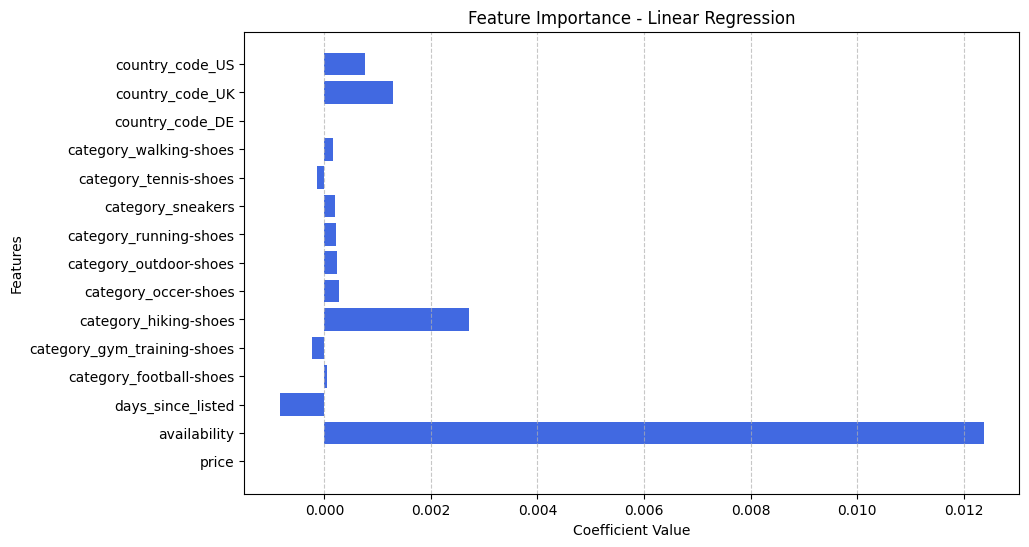

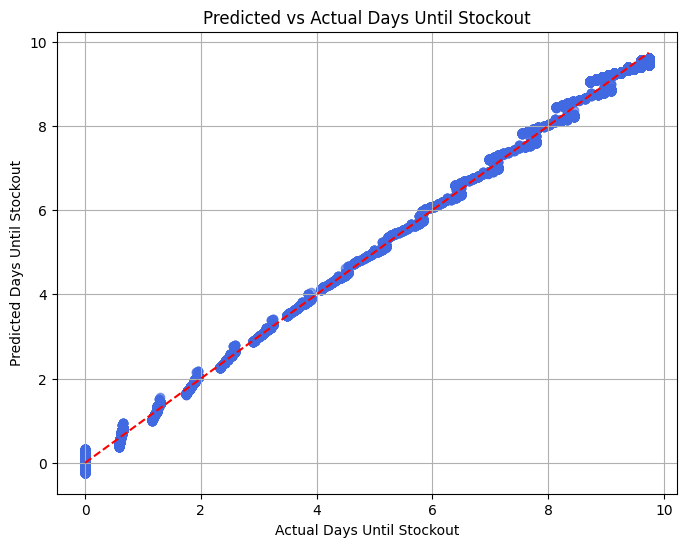

In [62]:
# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(X.columns, lr_model.coef_, color='royalblue')
plt.xlabel("Coefficient Value")
plt.ylabel("Features")
plt.title("Feature Importance - Linear Regression")
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

scaling_factor = 50

# Scale predictions and actual values
y_test_scaled = y_test * scaling_factor
y_pred_scaled = y_pred * scaling_factor

# Plot adjusted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test_scaled, y_pred_scaled, color='royalblue', alpha=0.6)
plt.plot([y_test_scaled.min(), y_test_scaled.max()], [y_test_scaled.min(), y_test_scaled.max()], 'r--')
plt.xlabel("Actual Days Until Stockout")
plt.ylabel("Predicted Days Until Stockout")
plt.title("Predicted vs Actual Days Until Stockout")
plt.grid(True)
plt.show()


# Key Findings and Insights

- **Preprocessing was one of the most crucial steps** in ensuring the accuracy and reliability of our predictions. By cleaning, categorizing, and standardizing features, we eliminated inconsistencies and ensured that the dataset was optimized for analysis. **High-quality data enables more meaningful insights and enhances model performance.**  
- **Exploratory Data Analysis (EDA) was the foundation of our study.** It allowed us to visualize trends, understand distributions, and identify relationships between features. Through EDA, we determined which attributes were most relevant for predicting availability, ensuring that only the most informative categories were used in modeling. **EDA, combined with domain knowledge, enabled us to filter out noise and focus on the most impactful variables.**  
- **The Random Forest model proved to be the most effective for our objective.** Since human decision making mirrors a decision tree structure where multiple factors are considered before selecting a product **Random Forest effectively simulates this process, making it an ideal choice for predicting shoe availability.** Additionally, its ensemble nature reduced overfitting while maintaining strong generalization across the dataset.  
- **Feature importance analysis revealed the key predictors of availability:**  
  - **US size (31.2%) and price (27.9%)** were the most influential factors, indicating that availability is closely linked to sizing patterns and pricing strategies.  
  - **Sub-colors, dominant color, category, and gender** also played a role but had a lower overall impact.  
  - **These insights suggest that inventory decisions should prioritize size and price optimization to better manage stock levels.**  
- **Our linear regression analysis helped forecast stock depletion trends.** By analyzing time-related data, we could estimate when certain shoes are likely to go out of stock. **This predictive capability is valuable for proactive inventory management, enabling Adidas to anticipate demand and adjust restocking strategies accordingly.**  
- **Our model achieved an accuracy of nearly 79%, demonstrating strong predictive performance.** Applying Hyperparameter tuning, this result confirms that our selected features effectively contribute to predicting availability and that our methodology aligns well with real-world purchasing patterns.  
- **The insights gained from this analysis offer significant business implications for Adidas.** By leveraging availability predictions, the Adidas website can implement **data-driven restocking strategies, optimize inventory turnover, and reduce costs associated with overstocking or stockouts.** **This can lead to increased efficiency, reduced operational waste, and potential revenue growth by ensuring that in-demand products remain available.**  
- **Beyond inventory management, these findings can also enhance marketing strategies.** Understanding which shoe sizes, price points, and categories drive availability can help **tailor promotions, recommend products more effectively, and refine targeted advertising campaigns to align with customer demand.**  

## Conclusion  
Through **comprehensive EDA, strategic feature selection, and robust modeling, we successfully identified the primary drivers of shoe availability and demonstrated the value of predictive analytics in inventory management.** Our findings suggest that **by focusing on size and price optimization, refining restocking techniques, and leveraging predictive analytics, Adidas can improve efficiency, minimize losses, and enhance customer satisfaction through better product availability.**


# Summary  

Our approach—combining **preprocessing, exploratory data analysis (EDA), and predictive modeling** provided valuable insights into the structure and behavior of our dataset. The **random forest model, achieving 79% accuracy**, validated that the selected features were effective in predicting shoe availability. By leveraging **feature importance analysis**, we identified that **shoe size and price** were the most impactful predictors of availability. This model offers Adidas the potential to **optimize inventory management**, ensuring that stocking decisions are data-driven rather than arbitrary.  

One key strength of our analysis is that it was **standardized for global application**, meaning it can be **adapted to various Adidas webstores worldwide**, rather than being limited to a specific region. This makes it a scalable and practical tool for inventory forecasting across different markets.  

# Limitations

Despite the promising results, there are several limitations to the current analysis that may affect the **validity** and **generalizability** of the model:  

- **Data Limitations**: The dataset provided does not include sales data, which would have been helpful to better understand how availability impacts actual sales. This gap limits our ability to predict demand and sales performance, which could have further improved the model.  
- **Imbalanced Data**: Certain shoe categories, like running shoes and sneakers, dominate the inventory, while others have far fewer entries. This imbalance could introduce bias into the model, especially if underrepresented categories are important for specific predictions.  
- **Feature Limitations**: Our model relied heavily on the features available, including shoe size, price, and color. The lack of additional features, such as customer preferences or seasonal trends, means that the model may not fully capture all factors influencing availability.  
- **Overfitting Risk**: While the random forest model achieved a good accuracy score, there’s still a possibility of overfitting. Since we did not perform extensive cross-validation or hyperparameter tuning due to computing power limitation, there’s a chance that the model could perform less effectively when exposed to unseen data.  


# Recommendations  

Based on the insights gained from our analysis and the predictive model, we propose the following actions and strategies to further enhance Adidas’s inventory management system and overall operational efficiency:

1. **Implement Predictive Availability Tools in Inventory Management:**
   - **Action:** Adidas should incorporate our **random forest model** into their existing inventory management system to forecast the availability of shoes at a global scale. The model can predict which shoes are likely to be in stock or out of stock, allowing Adidas to **optimize restocking strategies** and reduce both overstocking and stockouts.
   - **Impact:** This will help ensure that popular models are always available when consumers need them, improving **customer satisfaction** and potentially increasing sales. By anticipating demand, Adidas can also **reduce warehousing costs** associated with excess inventory.

2. **Create a Consumer Dashboard for Predictive Availability:**
   - **Action:** Adidas could build a **consumer-facing dashboard** that allows users to select a specific shoe category from a **dropdown menu** and predict the availability of shoes within that category. By integrating the availability prediction model into the dashboard, customers could quickly check the availability of their preferred shoe category.
   - **Impact:** This would improve the **customer experience** by providing them with an easy way to understand if their desired shoes are available or likely to be in stock. It could also reduce customer frustration related to out-of-stock items, increasing customer engagement and trust with the brand.

3. **Experiment with Alternative Models:**
   - **Action:** While the **random forest model** has shown good performance, Adidas should experiment with alternative models such as **neural networks** or **XGBoost** to evaluate if more complex algorithms can further enhance prediction accuracy, especially for niche product categories.
   - **Impact:** Exploring different machine learning models may lead to even more **precise predictions**, allowing Adidas to **fine-tune** their inventory management system and provide a better customer experience.


# References

1. **ChatGPT (OpenAI)**:  
   OpenAI. (2025). *ChatGPT*. Retrieved from https://www.openai.com/chatgpt

2. **CSMODEL**:  
   De La Salle University Manila, College of Computer Studies. (2025). *Statistical Modelling and Simulation*. Department of Computer Science, De La Salle University, 2025.

3. **Gemini (Google)**:  
   Google. (2025). *Gemini AI Model*. Retrieved from https://www.google.com/ai/gemini

4. **Kaggle**:  
   Kaggle. (2023). Adidas Webstore Shoe Data. Retrieved from https://www.kaggle.com/datasets/tamsnd/adidas-webstore-shoe-data/data

5. **McKinney, W.**:  
   McKinney, W. (2010). Data Structures for Statistical Computing in Python. *Proceedings of the 9th Python in Science Conference*.

6. **Pedregosa, F., Varoquaux, G., Gramfort, A., et al.**:  
   Pedregosa, F., Varoquaux, G., Gramfort, A., et al. (2011). Scikit-learn: Machine Learning in Python. *Journal of Machine Learning Research, 12*, 2825–2830.

7. **SOLDDA1**:  
   De La Salle University Manila, College of Computer Studies. (2025). *Business Intelligence and Data Analytics*. Department of Computer Science, De La Salle University, 2025.

8. **STINTSY**:  
   De La Salle University Manila, College of Computer Studies. (2025). *Advanced Intelligent Systems*. Department of Computer Science, De La Salle University, 2025.

9. **Waskom, M.**:  
   Waskom, M. (2020). Seaborn: Statistical Data Visualization. *Journal of Open Source Software, 6*(60), 3021.

10. **Hunter, J. D.**:  
    Hunter, J. D. (2007). Matplotlib: A 2D Graphics Environment. *Computing in Science & Engineering, 9*(3), 90–95.



### <center>----------------------End----------------------</center>